    Tampa Data Project Prompt
    Name: Olubayode Ebenezer
    Email:Olubayodeeben@gmail.com

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading Data

In [3]:
df_ray= pd.read_csv('battedBallData.csv')

In [4]:
df_ray.head()

,batter,pitcher,hittype,speed_A,vangle_A,speed_B,vangle_B
0,393,405,ground_ball,110.987569,4.194081,103.842569,3.164307
1,366,405,ground_ball,60.098403,-54.652102,28.092203,-28.324082
2,448,518,line_drive,102.757602,11.751851,97.846002,11.658800
3,140,518,fly_ball,61.952091,33.488154,59.389741,32.798274
4,521,518,line_drive,116.690861,22.700762,111.014561,23.164572


In [5]:
df_ray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73375 entries, 0 to 73374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   batter    73375 non-null  int64  
 1   pitcher   73375 non-null  int64  
 2   hittype   73375 non-null  object 
 3   speed_A   65803 non-null  float64
 4   vangle_A  65803 non-null  float64
 5   speed_B   71973 non-null  float64
 6   vangle_B  71973 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.9+ MB


In [6]:
df_ray.dtypes

batter        int64
pitcher       int64
hittype      object
speed_A     float64
vangle_A    float64
speed_B     float64
vangle_B    float64
dtype: object

In [7]:
df_ray['hittype'].unique()

array(['ground_ball', 'line_drive', 'fly_ball', 'popup', 'U'],
      dtype=object)

In [8]:
df_ray['hittype'].value_counts()

ground_ball    33239
line_drive     18166
fly_ball       16722
popup           5246
U                  2
Name: hittype, dtype: int64

In [9]:
df_ray['pitcher'].unique()

array([405, 518, 433,  38, 237, 222, 366, 516, 219, 235,  26, 640,  99,
       362, 599, 309,  44, 326, 432, 116, 412, 638, 256, 203, 437,  50,
       349, 526, 317, 418, 257, 370, 288, 411, 346, 121, 626, 321, 266,
       404, 164, 136, 472,  27, 364, 420, 194, 342, 184, 260, 234,  40,
       340,  48, 145, 558,  49, 293, 461, 486, 134, 489, 438, 546, 307,
       450, 292,  43, 246, 294, 251,  42, 529,  21, 443,  84, 180, 436,
        93, 254,   3,  51, 496,  89, 117, 414, 264, 258, 224, 570, 561,
       214,  63, 161, 331, 447, 125, 639, 182, 372, 143, 353,  46, 236,
       406, 401, 142,  72, 394, 559, 171,  81,  87, 118,  83,  88, 442,
       602, 311, 505, 148, 192, 628,  66,  54,  25, 107, 152, 449, 163,
       159, 170,  55,  73, 146,  53, 176, 183,  13, 352, 375, 228, 252,
       467, 153, 202, 315,  90,  31, 282, 104,  61,  75, 253, 419, 283,
        29, 305, 428, 273, 327, 572, 348, 286, 156, 371,  58, 179, 551,
       205, 239, 377, 573, 115, 446, 528, 195, 300,  17,  97, 59

In [10]:
# df_ray['pitcher'].value_counts()

In [11]:
df_ray['batter'].unique()

array([393, 366, 448, 140, 521, 401, 184,  88, 652, 672, 504, 324, 245,
        15, 148, 679, 198, 208, 530, 309, 542, 261, 339, 506,  10, 550,
       456, 353, 112, 767, 333, 537, 303, 777,  99, 215, 405, 491, 708,
        61,  74,  49, 422,  79, 115, 280,   8, 170, 279, 106, 218, 188,
       770, 592, 553, 199, 699, 790, 389,  76, 133, 114,   6,  14, 234,
       628, 503, 716,  60,  17, 533, 466,  48,  44, 439, 323, 384, 600,
       409, 356, 222, 450, 644, 104, 390, 534, 120, 558, 479, 690, 734,
       262,  77, 727, 397, 432, 415, 135,  41, 341, 325, 189, 362, 125,
       113, 308, 227, 102, 640,  92, 582, 326, 246, 126, 736, 201, 105,
       243, 411, 319, 286, 772, 677,  47,   5, 169, 349,  35, 454, 271,
       134, 496, 290,  22, 579, 164, 185, 270, 108,  20, 244, 307, 155,
       383, 543,  34, 161,  71, 342, 165, 172,  66,  42, 364, 662, 192,
       269, 447,  64,  94, 350, 103, 206,  90, 554, 721, 207,  11, 683,
       228, 749, 233, 129, 528, 634, 589, 123, 310, 272, 372, 56

In [12]:
# df_ray['batter'].value_counts()

# Checking unique Batter Hit Type

In [13]:
batter_hit_types = df_ray.groupby('batter')['hittype'].unique().reset_index()
batter_hit_types.rename(columns={'hittype': 'unique_hit_types'}, inplace=True)
print("Batters with their unique hit types:")
batter_hit_types.head(10)

Batters with their unique hit types:


,batter,unique_hit_types
0,1,"[line_drive, ground_ball, fly_ball, popup]"
1,2,"[fly_ball, ground_ball, line_drive, popup]"
2,3,"[ground_ball, fly_ball, popup]"
3,4,"[ground_ball, popup, line_drive, fly_ball]"
4,5,"[line_drive, ground_ball, fly_ball, popup]"
5,6,"[fly_ball, line_drive, ground_ball, popup]"
6,7,"[fly_ball, ground_ball, line_drive, popup]"
7,8,"[line_drive, fly_ball, popup, ground_ball]"
8,9,[ground_ball]
9,10,"[ground_ball, line_drive, fly_ball, popup]"


 ### Batters with the highest number of different hit types

In [14]:
batter_hit_type_counts = df_ray.groupby('batter')['hittype'].nunique().reset_index()
batter_hit_type_counts.rename(columns={'hittype': 'unique_hit_type_count'}, inplace=True)

# Sort by the unique hit types
batter_hit_type_counts_sorted = batter_hit_type_counts.sort_values(by='unique_hit_type_count', ascending=False)

print("Batters with the highest diversity in hit types:")
batter_hit_type_counts_sorted.head(10)

Batters with the highest diversity in hit types:


,batter,unique_hit_type_count
492,493,5
478,479,5
0,1,4
470,471,4
455,456,4
456,457,4
464,465,4
465,466,4
466,467,4
468,469,4


In [15]:
batter_hit_type_counts_sorted.tail(5)

,batter,unique_hit_type_count
654,655,1
728,729,1
225,226,1
54,55,1
145,146,1


### Each batter has a unique different number of hit type common to them

# Checking the Qaulity of the Data

In [16]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [17]:
quality_report(df_ray)

,Total NaN,Percent of NaN,Nunique,Dtype
speed_A,7572,10.319591,65803,float64
vangle_A,7572,10.319591,65803,float64
speed_B,1402,1.910733,71973,float64
vangle_B,1402,1.910733,71973,float64
batter,0,0.000000,816,int64
pitcher,0,0.000000,645,int64
hittype,0,0.000000,5,object


<AxesSubplot:>

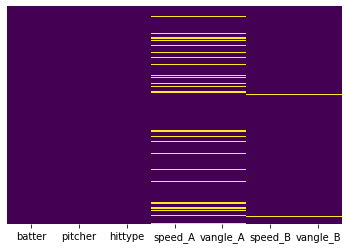

In [18]:
import seaborn as sns
sns.heatmap(df_ray.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(5,3))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

count    73375.000000
mean       365.135005
std        229.816539
min          1.000000
25%        170.000000
50%        341.000000
75%        550.000000
max        816.000000
Name: batter, dtype: float64


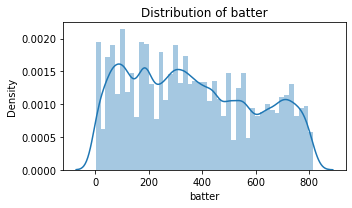

count    73375.000000
mean       289.957547
std        186.406565
min          1.000000
25%        121.000000
50%        283.000000
75%        447.000000
max        645.000000
Name: pitcher, dtype: float64


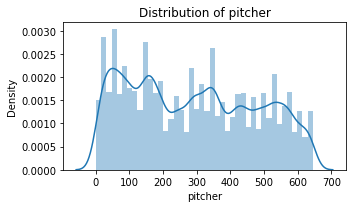

count    65803.000000
mean        88.425429
std         13.192938
min         26.461824
25%         80.362652
50%         90.638747
75%         98.317818
max        121.847456
Name: speed_A, dtype: float64


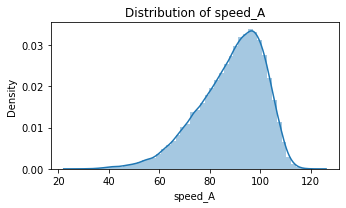

count    65803.000000
mean        10.853558
std         24.024058
min        -91.898629
25%         -5.558918
50%         11.005251
75%         27.404976
max         78.460978
Name: vangle_A, dtype: float64


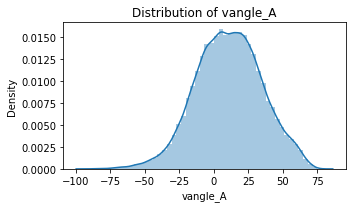

count    71973.000000
mean        77.748243
std         18.621538
min          5.152318
25%         66.074054
50%         81.886750
75%         92.326944
max        114.403356
Name: speed_B, dtype: float64


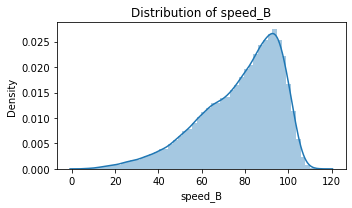

count    71973.000000
mean        13.094305
std         24.429536
min        -85.090929
25%         -4.634815
50%         10.546230
75%         28.880589
max         90.900819
Name: vangle_B, dtype: float64


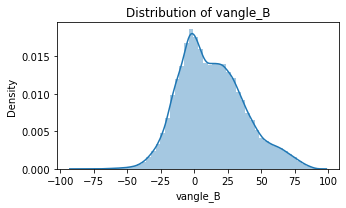

In [20]:
numeric_distribution_plot(df_ray)

In [21]:
df_ray.describe()

,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,73375.000000,73375.000000,65803.000000,65803.000000,71973.000000,71973.000000
mean,365.135005,289.957547,88.425429,10.853558,77.748243,13.094305
std,229.816539,186.406565,13.192938,24.024058,18.621538,24.429536
min,1.000000,1.000000,26.461824,-91.898629,5.152318,-85.090929
25%,170.000000,121.000000,80.362652,-5.558918,66.074054,-4.634815
50%,341.000000,283.000000,90.638747,11.005251,81.886750,10.546230
75%,550.000000,447.000000,98.317818,27.404976,92.326944,28.880589
max,816.000000,645.000000,121.847456,78.460978,114.403356,90.900819


#### Descriptive Statistics Summary
1.	Count:

    speed_A and vangle_A have 65,803 measurements, while speed_B and vangle_B have slightly more at 71,973. This difference suggests that System B covers a wider range of data points but may introduce more noise or systematic measurement differences.

2.	Mean:

    speed_A mean is 88.43 mph, while speed_B mean is 77.75 mph. This difference further supports that System B tends to record lower speeds, likely due to measurement differences/error.

    vangle_A and vangle_B have means of 10.85 and 13.09 degrees, respectively. The higher mean for vangle_B suggests that System B consistently records slightly higher vertical angles showing that System B might have a systematic upward bias.

3.	Standard Deviation (std):

    The standard deviation for speed_A (13.19) is lower than for speed_B (18.62), indicating that System B’s measurements are more variable. This higher variability could mean that System B is either less precise or captures a wider range of batted ball conditions. This variability makes System B less reliable without adjustment.
    
    The standard deviations for vangle_A (24.02) and vangle_B (24.43) are similar, suggesting that while System B may have a bias, it still provides a reasonable spread of values for vertical angles. This similarity in spread means that adjustments may focus more on central tendency (mean differences) than on variability.

4.	Minimum and Maximum:

    Both speed_A and speed_B show a wide range, with speed_A going from around 26.46 mph to 121.85 mph and speed_B from 5.15 mph to 114.4 mph. The low minimum for speed_B suggests potential anomalies or outliers on the low end.

    vangle_A ranges from -91.89 to 78.46 degrees, while vangle_B ranges from -85.09 to 90.90 degrees. These extreme values could correspond to unusual hit types (e.g., popups or sharply downward hits), but outliers on both ends need examination to ensure they are not erroneous.

In [22]:
# df_ray.loc[df_ray['speed_B'] < 25]
# df_ray.loc[df_ray['speed_A'] < 55]
# df_ray.loc[df_ray['vangle_B'] < -55]
# df_ray.loc[df_ray['vangle_B'] > 75]
# df_ray.loc[df_ray['vangle_A'] < -50]
# df_ray.loc[df_ray['vangle_A'] > 75]

# Checking and Treating  Possible outliers

<AxesSubplot:xlabel='speed_B'>

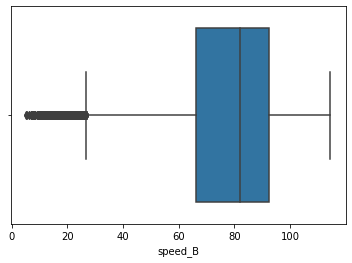

In [23]:
sns.boxplot(df_ray['speed_B'])

In [24]:
# df_ray.loc[df_ray['speed_B'] < 25]

<AxesSubplot:xlabel='speed_A'>

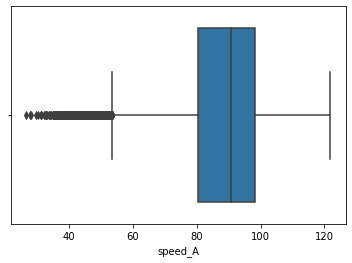

In [25]:
sns.boxplot(df_ray['speed_A'])

In [26]:
# df_ray.loc[df_ray['speed_A'] < 55]

<AxesSubplot:xlabel='vangle_B'>

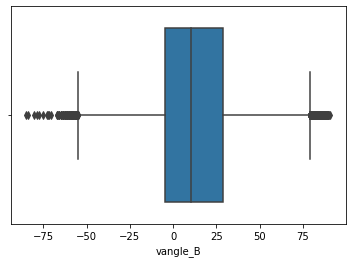

In [27]:
sns.boxplot(df_ray['vangle_B'])

In [28]:
# df_ray.loc[df_ray['vangle_B'] < -55]

In [29]:
# df_ray.loc[df_ray['vangle_B'] > 75]

<AxesSubplot:xlabel='vangle_A'>

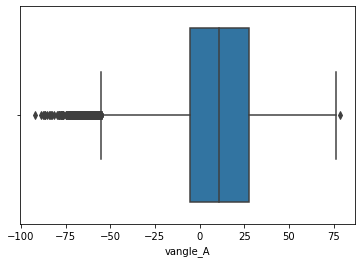

In [30]:
sns.boxplot(df_ray['vangle_A'])

In [31]:
# df_ray.loc[df_ray['vangle_A'] < -50]

In [32]:
# df_ray.loc[df_ray['vangle_A'] > 75]

### Removing the Outliers

In [33]:
# I defined the conditions for filtering out rows (the outliers)
condition = (
    (df_ray['speed_B'] < 35) |
    (df_ray['speed_A'] < 58) |
    (df_ray['vangle_B'] < -50) |
    (df_ray['vangle_B'] > 75) |
    (df_ray['vangle_A'] < -50) |
    (df_ray['vangle_A'] > 75)
)

# Filter the DataFrame to exclude rows meeting any of the conditions stated above
df_ray_filtered = df_ray[~condition]

# checking the shape of the original and filtered DataFrames for comparison
df_ray.shape, df_ray_filtered.shape

((73375, 7), (69284, 7))

# DATA PREPROCESSING

In [34]:
df_ray.head(5)

,batter,pitcher,hittype,speed_A,vangle_A,speed_B,vangle_B
0,393,405,ground_ball,110.987569,4.194081,103.842569,3.164307
1,366,405,ground_ball,60.098403,-54.652102,28.092203,-28.324082
2,448,518,line_drive,102.757602,11.751851,97.846002,11.658800
3,140,518,fly_ball,61.952091,33.488154,59.389741,32.798274
4,521,518,line_drive,116.690861,22.700762,111.014561,23.164572


In [35]:
df_ray_filtered.head(5)

,batter,pitcher,hittype,speed_A,vangle_A,speed_B,vangle_B
0,393,405,ground_ball,110.987569,4.194081,103.842569,3.164307
2,448,518,line_drive,102.757602,11.751851,97.846002,11.658800
3,140,518,fly_ball,61.952091,33.488154,59.389741,32.798274
4,521,518,line_drive,116.690861,22.700762,111.014561,23.164572
5,401,518,ground_ball,105.981831,-10.497794,78.508931,-7.471214


<AxesSubplot:xlabel='vangle_B'>

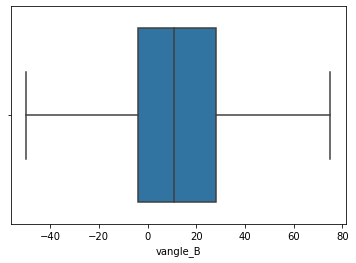

In [36]:
sns.boxplot(df_ray_filtered['vangle_B'])

<AxesSubplot:xlabel='speed_B'>

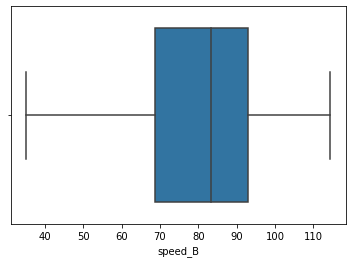

In [37]:
sns.boxplot(df_ray_filtered['speed_B'])

<AxesSubplot:xlabel='vangle_A'>

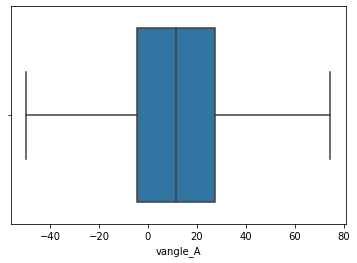

In [38]:
sns.boxplot(df_ray_filtered['vangle_A'])

<AxesSubplot:xlabel='speed_A'>

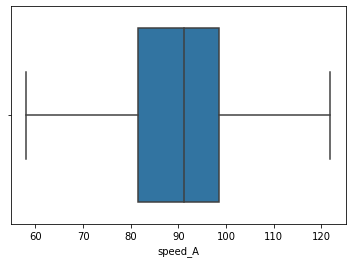

In [39]:
sns.boxplot(df_ray_filtered['speed_A'])

In [40]:
quality_report(df_ray)

,Total NaN,Percent of NaN,Nunique,Dtype
speed_A,7572,10.319591,65803,float64
vangle_A,7572,10.319591,65803,float64
speed_B,1402,1.910733,71973,float64
vangle_B,1402,1.910733,71973,float64
batter,0,0.000000,816,int64
pitcher,0,0.000000,645,int64
hittype,0,0.000000,5,object


In [41]:
quality_report(df_ray_filtered)

,Total NaN,Percent of NaN,Nunique,Dtype
speed_A,5647,8.150511,63637,float64
vangle_A,5647,8.150511,63637,float64
speed_B,1306,1.884995,67978,float64
vangle_B,1306,1.884995,67978,float64
batter,0,0.000000,808,int64
pitcher,0,0.000000,645,int64
hittype,0,0.000000,5,object


### Plotting the Boxplot for speed and the angle comparison for A After removing possible outliers

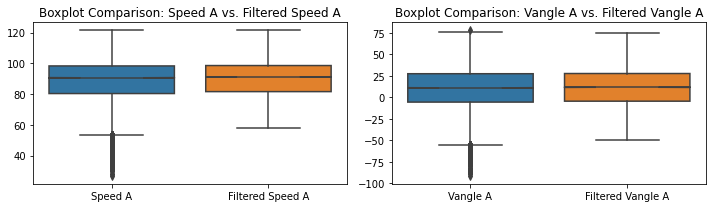

In [46]:

# Boxplot for speed 
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=[df_ray['speed_A'], df_ray_filtered['speed_A']], notch=True)
plt.xticks([0, 1], ['Speed A', 'Filtered Speed A'])
plt.title('Boxplot Comparison: Speed A vs. Filtered Speed A')

# Boxplot for vertical angle comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_ray['vangle_A'], df_ray_filtered['vangle_A']], notch=True)
plt.xticks([0, 1], ['Vangle A', 'Filtered Vangle A'])
plt.title('Boxplot Comparison: Vangle A vs. Filtered Vangle A')

plt.tight_layout()
plt.show()


### Plotting the Boxplot for speed and the angle comparison for B

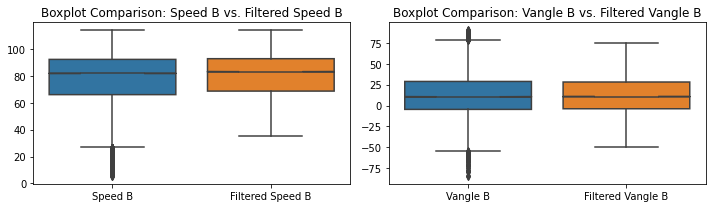

In [47]:


# Boxplot for speed comparison
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=[df_ray['speed_B'], df_ray_filtered['speed_B']], notch=True)
plt.xticks([0, 1], ['Speed B', 'Filtered Speed B'])
plt.title('Boxplot Comparison: Speed B vs. Filtered Speed B')

# Boxplot for vertical angle comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_ray['vangle_B'], df_ray_filtered['vangle_B']], notch=True)
plt.xticks([0, 1], ['Vangle B', 'Filtered Vangle B'])
plt.title('Boxplot Comparison: Vangle B vs. Filtered Vangle B')

plt.tight_layout()
plt.show()


    Based on the boxplots, System B generally records lower speeds than System A. This is observed in the following ways:

    Median Speed: The median speed for System B is visibly lower than that of System A, indicating that System B’s typical (or central) recorded speed is lower.

    Range of Values: System B shows a wider spread of lower values, especially with some extremely low outliers that aren’t as common in System A. This suggests that System B might capture slower speeds more frequently, possibly due to a calibration difference or measurement sensitivity.

    Filtered Comparison: After filtering out some extreme values, the median speeds of System B get closer to System A, but System B still tends to lean toward slightly lower speeds overall.

    This difference suggests that System B may require calibration to bring its speed values into alignment with System A, especially since System A is considered the more accurate or standard system


    System B tends to record slightly higher launch angles than System A on average, which may require a small downward calibration if alignment with System A is desired

# DATA PREPROCESSING

In [44]:
# df_ray_filtered['batter'].value_counts()

In [45]:
# df_ray_filtered['pitcher'].value_counts()

In [46]:
df_ray_filtered['hittype'].value_counts()

ground_ball    30275
line_drive     18045
fly_ball       16714
popup           4248
U                  2
Name: hittype, dtype: int64

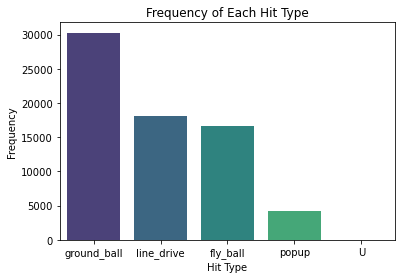

In [48]:
# Count the frequency of each hit type
hittype_counts = df_ray_filtered['hittype'].value_counts()

# Plot a bar chart for hit type frequency
plt.figure(figsize=(6, 4))
sns.barplot(x=hittype_counts.index, y=hittype_counts.values, palette="viridis")
plt.xlabel("Hit Type")
plt.ylabel("Frequency")
plt.title("Frequency of Each Hit Type")
plt.show()


### REMOVE ALL ROWS WHERE 'hittype' is 'U' SINCE IT IS NOT PART OF THE HIT TYPE TO CONSIDERED 

In [49]:
df_ray_filtered = df_ray_filtered[df_ray_filtered['hittype'] != 'U']

# check the shape 
df_ray_filtered.shape


(69282, 7)

# TREATING MISSING VALUES 

In [50]:
# Calculate the hittype-batter group medians
group_medians_speed_A_batter = df_ray_filtered.groupby(['hittype', 'batter'])['speed_A'].median().to_dict()
group_medians_vangle_A_batter = df_ray_filtered.groupby(['hittype', 'batter'])['vangle_A'].median().to_dict()
group_medians_speed_B_batter = df_ray_filtered.groupby(['hittype', 'batter'])['speed_B'].median().to_dict()
group_medians_vangle_B_batter = df_ray_filtered.groupby(['hittype', 'batter'])['vangle_B'].median().to_dict()

# Calculate fallback group medians using hittype only in case there is not enough data for certain combinations of hittype and batter 
#i.e If a particular batter does not have enough records for a specific hittype, 
# calculating the median would not be meaningful, especially if only a single or very few records exist.
group_medians_speed_A_hittype = df_ray_filtered.groupby('hittype')['speed_A'].median().to_dict()
group_medians_vangle_A_hittype = df_ray_filtered.groupby('hittype')['vangle_A'].median().to_dict()
group_medians_speed_B_hittype = df_ray_filtered.groupby('hittype')['speed_B'].median().to_dict()
group_medians_vangle_B_hittype = df_ray_filtered.groupby('hittype')['vangle_B'].median().to_dict()

# function to apply the fallback
def fill_missing_by_hittype_fallback(row, primary_group, fallback_group, column_name):
    hittype = row['hittype']
    batter = row['batter']
    # Try hittype-batter median first, fallback to hittype median if NaN
    value = primary_group.get((hittype, batter))
    if pd.isnull(value):  # If the primary median is NaN, use hittype median
        value = fallback_group.get(hittype)
    return value if pd.notnull(value) else row[column_name]  # Use original if all else fails

# Apply the function to each column
for column, primary_group, fallback_group in [
    ('speed_A', group_medians_speed_A_batter, group_medians_speed_A_hittype),
    ('vangle_A', group_medians_vangle_A_batter, group_medians_vangle_A_hittype),
    ('speed_B', group_medians_speed_B_batter, group_medians_speed_B_hittype),
    ('vangle_B', group_medians_vangle_B_batter, group_medians_vangle_B_hittype)
]:
    df_ray_filtered[column] = df_ray_filtered.apply(
        lambda row: fill_missing_by_hittype_fallback(row, primary_group, fallback_group, column), axis=1)

# Verify missing values
quality_report(df_ray_filtered)

,Total NaN,Percent of NaN,Nunique,Dtype
batter,0,0.0,808,int64
pitcher,0,0.0,645,int64
hittype,0,0.0,4,object
speed_A,0,0.0,2606,float64
vangle_A,0,0.0,2606,float64
speed_B,0,0.0,2677,float64
vangle_B,0,0.0,2677,float64


In [51]:
df_ray_filtered.head()

,batter,pitcher,hittype,speed_A,vangle_A,speed_B,vangle_B
0,393,405,ground_ball,95.668364,-12.841748,66.465229,-8.389491
2,448,518,line_drive,95.328485,16.732373,90.781249,16.395530
3,140,518,fly_ball,87.742940,33.475045,83.714880,33.887693
4,521,518,line_drive,114.583564,21.329170,108.923314,21.880465
5,401,518,ground_ball,92.172531,-6.976002,69.791293,-5.581535


In [52]:
df_ray_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69282 entries, 0 to 73374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   batter    69282 non-null  int64  
 1   pitcher   69282 non-null  int64  
 2   hittype   69282 non-null  object 
 3   speed_A   69282 non-null  float64
 4   vangle_A  69282 non-null  float64
 5   speed_B   69282 non-null  float64
 6   vangle_B  69282 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.2+ MB


In [53]:
df_ray_filtered.describe()

,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,69282.000000,69282.000000,69282.000000,69282.000000,69282.000000,69282.000000
mean,364.763055,290.164170,90.830590,12.661297,80.166625,13.595005
std,229.850070,186.416579,5.956201,20.667606,10.436417,20.562277
min,1.000000,1.000000,58.187713,-42.474370,38.031542,-32.641852
25%,170.000000,121.000000,88.301596,-6.494889,70.753729,-4.869675
50%,341.000000,283.000000,91.394238,13.712355,81.323933,13.115106
75%,550.000000,447.000000,94.591727,31.729070,89.622198,31.931567
max,816.000000,645.000000,114.583564,71.349293,108.923314,74.862364


<AxesSubplot:>

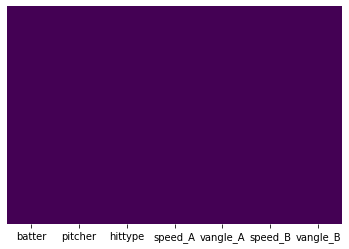

In [54]:
import seaborn as sns
sns.heatmap(df_ray_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### The data is cleaned

In [55]:
# Calculate mean values for each batter in System A and calibrated System B
batter_stats = df_ray_filtered.groupby('batter').agg(
    avg_speed_A=('speed_A', 'mean'),
    avg_speed_B=('speed_B', 'mean'),
    avg_vangle_A=('vangle_A', 'mean'),
    avg_vangle_B=('vangle_B', 'mean')
).reset_index()

# Calculate the deviations for speed and vangle
batter_stats['avg_speed_diff'] = batter_stats['avg_speed_A'] - batter_stats['avg_speed_B']
batter_stats['avg_vangle_diff'] = batter_stats['avg_vangle_A'] - batter_stats['avg_vangle_B']


batter_stats[['batter', 'avg_speed_diff', 'avg_vangle_diff']].head()

,batter,avg_speed_diff,avg_vangle_diff
0,1,12.576333,-2.183274
1,2,17.822394,-5.381204
2,3,17.800918,-0.093704
3,4,13.222896,-1.145519
4,5,11.804890,-2.797730


## Scatter plot for speed and Angle deviations Between System A and System B

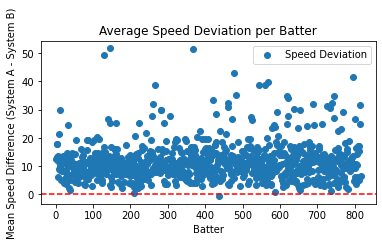

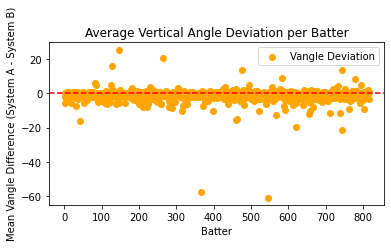

In [56]:
# Scatter plot for speed deviations
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['avg_speed_diff'], label='Speed Deviation')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference (System A - System B)')
plt.title('Average Speed Deviation per Batter')
plt.legend()
plt.show()

# Scatter plot for vertical angle deviations
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['avg_vangle_diff'], label='Vangle Deviation', color='orange')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Vangle Difference (System A - System B)')
plt.title('Average Vertical Angle Deviation per Batter')
plt.legend()
plt.show()

###  Observations and Calibration Strategy:
    There is significant difference in speed deviations:

    Since System B shows larger and more varied speed deviations compared to System A, it confirms that System B's raw measurements are less consistent with System A, as indicated by the variability in the scatter plot.
    These larger deviations justify a stronger calibration approach to bring System B closer to System A, particularly for speed values.

    For the Vangle, It deviates with Smaller Spread:

    The vangle deviations are less spread out, suggesting that System B’s vangle measurements are closer to System A in terms of distribution. However, some consistent biases remain, as seen from the clustering around zero with occasional outliers.

## Exploring the dynamics of Speed_B

In [55]:
# Display min, max, and unique values for each hit type
hit_type_stats = {}

# Loop through each hit type
for hit_type in df_ray_filtered['hittype'].unique():
    # Filter data for the specific hit type
    subset = df_ray_filtered[df_ray_filtered['hittype'] == hit_type]
    
    # Calculate min and max values for speed and vertical angle
    min_speed = subset['speed_B'].min()
    max_speed = subset['speed_B'].max()
    min_vangle = subset['vangle_B'].min()
    max_vangle = subset['vangle_B'].max()
    
    # Get unique values for speed and vangle columns
    unique_speed_values = subset['speed_B'].unique()
    unique_vangle_values = subset['vangle_B'].unique()
    
    # Store results in a dictionary
    hit_type_stats[hit_type] = {
        'min_speed_B': min_speed,
        'max_speed_B': max_speed,
        'min_vangle_B': min_vangle,
        'max_vangle_B': max_vangle,
        'unique_speed_values': unique_speed_values,
        'unique_vangle_values': unique_vangle_values
    }

# Display the results
for hit_type, stats in hit_type_stats.items():
    print(f"\nHit Type: {hit_type}")
    print(f"  Min Speed_B: {stats['min_speed_B']}, Max Speed_B: {stats['max_speed_B']}")
    print(f"  Min Vangle_B: {stats['min_vangle_B']}, Max Vangle_B: {stats['max_vangle_B']}")
    # print(f"  Unique Speed_B Values: {stats['unique_speed_values']}")
    # print(f"  Unique Vangle_B Values: {stats['unique_vangle_values']}")



Hit Type: ground_ball
  Min Speed_B: 38.0315417989545, Max Speed_B: 100.3065757198882
  Min Vangle_B: -32.6418519345231, Max Vangle_B: 53.5491346878581

Hit Type: line_drive
  Min Speed_B: 56.5752049239434, Max Speed_B: 108.9233144413945
  Min Vangle_B: -0.704515265902877, Max Vangle_B: 31.1800517819948

Hit Type: fly_ball
  Min Speed_B: 60.6780173609603, Max Speed_B: 103.460092870677
  Min Vangle_B: 18.2792277208425, Max Vangle_B: 59.4100004421972

Hit Type: popup
  Min Speed_B: 44.4568932947069, Max Speed_B: 91.8488232518781
  Min Vangle_B: 30.5333198792212, Max Vangle_B: 74.8623641437933


# Rechecking the distribution again 

count    69282.000000
mean       364.763055
std        229.850070
min          1.000000
25%        170.000000
50%        341.000000
75%        550.000000
max        816.000000
Name: batter, dtype: float64


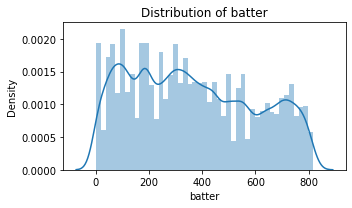

count    69282.000000
mean       290.164170
std        186.416579
min          1.000000
25%        121.000000
50%        283.000000
75%        447.000000
max        645.000000
Name: pitcher, dtype: float64


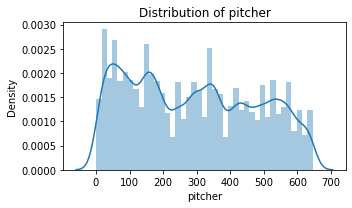

count    69282.000000
mean        90.830590
std          5.956201
min         58.187713
25%         88.301596
50%         91.394238
75%         94.591727
max        114.583564
Name: speed_A, dtype: float64


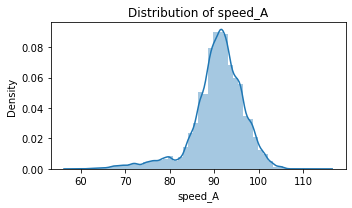

count    69282.000000
mean        12.661297
std         20.667606
min        -42.474370
25%         -6.494889
50%         13.712355
75%         31.729070
max         71.349293
Name: vangle_A, dtype: float64


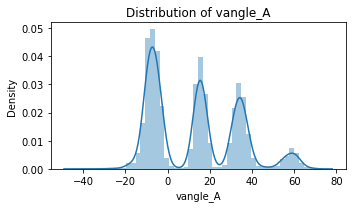

count    69282.000000
mean        80.166625
std         10.436417
min         38.031542
25%         70.753729
50%         81.323933
75%         89.622198
max        108.923314
Name: speed_B, dtype: float64


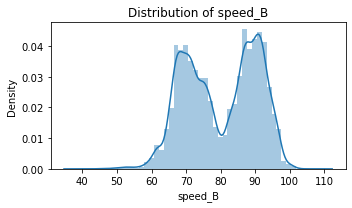

count    69282.000000
mean        13.595005
std         20.562277
min        -32.641852
25%         -4.869675
50%         13.115106
75%         31.931567
max         74.862364
Name: vangle_B, dtype: float64


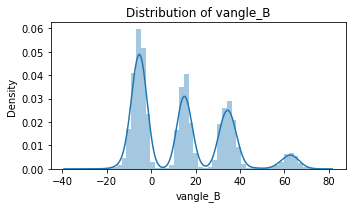

In [57]:
numeric_distribution_plot(df_ray_filtered)

# Examining Frequent Batters

In [58]:
top_batters = df_ray_filtered['batter'].value_counts().head(5).index


# Aggregate the average speed and angle for these top batters 
batter_analysis = df_ray_filtered[df_ray_filtered['batter'].isin(top_batters)].groupby(['batter','hittype'])[['speed_A', 'vangle_A', 'speed_B', 'vangle_B']].mean()

In [59]:
batter_analysis

speed_A   vangle_A    speed_B   vangle_B
batter hittype                                                
72     fly_ball     86.253346  33.845823  82.320037  33.420472
       ground_ball  90.826070  -6.075973  70.985767  -3.065520
       line_drive   90.245283  16.260369  86.402274  15.965811
       popup        68.526967  57.020210  67.311870  60.907547
133    fly_ball     92.029526  30.578225  88.466244  29.996112
       ground_ball  90.914348  -9.881225  67.893882  -7.661124
       line_drive   97.300461  12.791959  92.694211  12.581419
       popup        78.897395  60.461572  74.297331  62.360323
188    fly_ball     94.935199  31.477837  91.587622  31.326634
       ground_ball  95.901479  -8.631230  74.489747  -7.535828
       line_drive   98.284271  13.029448  94.123841  12.755979
       popup        79.965835  63.209266  77.903089  64.685248
279    fly_ball     91.235911  33.891739  87.326873  32.903246
       ground_ball  96.260072  -4.531677  76.027420  -3.715878
       line_drive   96.850203  15.391413  92.181554  14.830956
       popup        77.157510  59.842248  70.348550  62.587054
503    fly_ball     90.676487  28.667866  87.312698  28.354690
       ground_ball  89.301770 -10.602406  72.269620  -8.650055
       line_drive   94.510009  12.182845  90.696829  11.766881
       popup        75.157520  54.900565  73.057242  61.549399

In [60]:
batter_analysis.tail(15)

speed_A   vangle_A    speed_B   vangle_B
batter hittype                                                
133    ground_ball  90.914348  -9.881225  67.893882  -7.661124
       line_drive   97.300461  12.791959  92.694211  12.581419
       popup        78.897395  60.461572  74.297331  62.360323
188    fly_ball     94.935199  31.477837  91.587622  31.326634
       ground_ball  95.901479  -8.631230  74.489747  -7.535828
       line_drive   98.284271  13.029448  94.123841  12.755979
       popup        79.965835  63.209266  77.903089  64.685248
279    fly_ball     91.235911  33.891739  87.326873  32.903246
       ground_ball  96.260072  -4.531677  76.027420  -3.715878
       line_drive   96.850203  15.391413  92.181554  14.830956
       popup        77.157510  59.842248  70.348550  62.587054
503    fly_ball     90.676487  28.667866  87.312698  28.354690
       ground_ball  89.301770 -10.602406  72.269620  -8.650055
       line_drive   94.510009  12.182845  90.696829  11.766881
       popup        75.157520  54.900565  73.057242  61.549399

## batters with the highest variety of hit types

In [61]:
# Count the unique hittype categories for each batter
batter_hit_types = df_ray_filtered.groupby('batter')['hittype'].nunique().reset_index()

# Renaming the columns
batter_hit_types.columns = ['batter', 'unique_hit_types']

# Sort the unique hit types in descending order to see batters with the highest variety at the top
batter_hit_types_sorted = batter_hit_types.sort_values(by='unique_hit_types', ascending=False)


print("Batters with the highest variety of hit types:")
batter_hit_types_sorted.head()


Batters with the highest variety of hit types:


,batter,unique_hit_types
0,1,4
373,376,4
662,669,4
368,371,4
369,372,4


In [62]:
batter_hit_types_sorted.tail()

,batter,unique_hit_types
648,655,1
198,200,1
414,418,1
202,204,1
280,283,1


# Total number of each hittype for each batter:

In [63]:
# Group by batter and hittype and count occurrences
batter_hittype_counts = df_ray_filtered.groupby(['batter', 'hittype']).size().reset_index(name='count')

# Display the result
print("Total number of each hittype for each batter:")
batter_hittype_counts.head()

Total number of each hittype for each batter:


,batter,hittype,count
0,1,fly_ball,18
1,1,ground_ball,40
2,1,line_drive,18
3,1,popup,3
4,2,fly_ball,2


In [64]:
batter_hittype_counts.tail()

,batter,hittype,count
2686,814,line_drive,4
2687,815,ground_ball,9
2688,816,ground_ball,4
2689,816,line_drive,2
2690,816,popup,1


    By looking at the entire range of batter to hittype counts, It shows that some batters have a more varied hit type distribution than others who focus on or are limited to certain hit types.
    This shows that certain batters are more versatile (having all hit types) or specialized in a particular hit type.
    This would be helpful in projection the next season speed for those batter

# Descriptive Summary 

In [65]:
df_ray_filtered.describe()

,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,69282.000000,69282.000000,69282.000000,69282.000000,69282.000000,69282.000000
mean,364.763055,290.164170,90.830590,12.661297,80.166625,13.595005
std,229.850070,186.416579,5.956201,20.667606,10.436417,20.562277
min,1.000000,1.000000,58.187713,-42.474370,38.031542,-32.641852
25%,170.000000,121.000000,88.301596,-6.494889,70.753729,-4.869675
50%,341.000000,283.000000,91.394238,13.712355,81.323933,13.115106
75%,550.000000,447.000000,94.591727,31.729070,89.622198,31.931567
max,816.000000,645.000000,114.583564,71.349293,108.923314,74.862364


## Central Tendencies and Variability After Data has been cleaned:

### Speed (speed_A vs. speed_B):
    Mean: The average speed recorded by System A (speed_A) is 90.83 mph, while System B (speed_B) records a lower average speed of 80.17 mph. This substantial difference suggest a bias or systematic offset in System B’s measurements.

    Standard Deviation: System A has a lower standard deviation (5.96) compared to System B (10.44), which means that System A captures speed with less variability, potentially making it more reliable. The higher variability in System B might mean it is less precise.

### Vertical Angle (vangle_A vs. vangle_B):
    Mean: System A and System B both have similar average angles (vangle_A = 12.66, vangle_B = 13.60), suggesting less overall bias in angle measurement compared to speed.

    Standard Deviation: The standard deviation values are also similar for vangle_A (20.67) and vangle_B (20.56), indicating that both systems capture a similar spread in vertical angles.

## Distribution of Batter and Pitcher IDs:

    There are many unique identifiers for both batters and pitchers, with batter values ranging from 1 to 816 and pitcher values from 1 to 645. After data processing the number of batter is still the same 

In [65]:
df_ray['batter'].max()

816

In [66]:
df_ray_filtered['batter'].max()

816

## Hit Types and It's Associated EXIT VELOCITY AND LAUNCH ANGLES
This will help me to understand the typical speed and angle values associated with each hit type, it will help avoid biases that could arise if certain hit types are more common in the outliers

In [67]:
# Calculate mean and median speed and angle for each hit type for both systems
hit_type_adjustments = df_ray_filtered.groupby('hittype').agg({
    'speed_A': ['mean', 'median'],
    'vangle_A': ['mean', 'median'],
    'speed_B': ['mean', 'median'],
    'vangle_B': ['mean', 'median']
}).reset_index()

# Renaming the columns for easy understanding
hit_type_adjustments.columns = [
    'Hit Type', 'Mean Speed A', 'Median Speed A', 'Mean Vangle A', 'Median Vangle A', 
    'Mean Speed B', 'Median Speed B', 'Mean Vangle B', 'Median Vangle B'
]

In [68]:

hit_type_adjustments.head()

,Hit Type,Mean Speed A,Median Speed A,Mean Vangle A,Median Vangle A,Mean Speed B,Median Speed B,Mean Vangle B,Median Vangle B
0,fly_ball,90.995187,91.028972,34.314500,34.218417,87.292794,87.221337,34.580214,34.516718
1,ground_ball,90.047499,90.235671,-7.360394,-7.224922,70.593128,70.285925,-5.676870,-5.508665
2,line_drive,95.462106,95.570633,15.543188,15.396472,91.236820,91.389480,15.064854,15.027637
3,popup,76.089843,76.305928,57.915842,58.519980,73.332623,73.790725,62.132149,62.519161


### Insights:

    Fly Ball vs. Ground Ball: Fly balls have significantly higher average launch angles (vangle) compared to ground balls. This indicates that fly balls naturally travel at higher angles, while ground balls have negative or low angles, as expected.

    Popups show the highest average launch angles, confirming that these hits are sharply angled upwards.

    Line drives have moderate angles and slightly higher speeds, indicating a flatter, faster trajectory compared to other hit types.

## General Insights From Analysis

    After performing ccertain analysis to understand the data I found out that there are clear discrepancies that emerge between System A and System B in both speed and vertical angle measurements. System B consistently records lower average speeds than System A, with a mean difference of approximately 10 mph, and exhibits a broader range (higher standard deviation), suggesting less precision and potential bias. This heightened variability makes System B’s speed data unreliable in isolation, particularly as System A captures speed with much tighter consistency. While the vertical angles (vangle) show a smaller mean difference and similar variability between the systems with a slight upward bias in System B remains noticeable. 

    Having this insghts in mind especially the systematic deviations, calibrating System B to align more closely with System A is essential to achieve a more accurate representation of the true values, especially for speed, where significant adjustments are warranted. Calibration will ensure both systems align in scale and central tendency, facilitating a reliable combined dataset that can better support projections and analysis tasks.

# MODELING

# Checking for LINEAR RELATIONSHIP

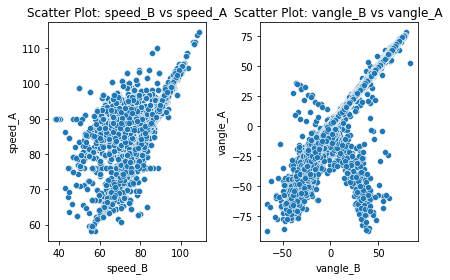

,speed_A,speed_B,vangle_A,vangle_B
speed_A,1.000000,0.575857,-0.238338,-0.283043
speed_B,0.575857,1.000000,0.535188,0.486977
vangle_A,-0.238338,0.535188,1.000000,0.994858
vangle_B,-0.283043,0.486977,0.994858,1.000000


In [67]:
# Calculate correlation coefficients
correlations = df_ray_filtered[['speed_A', 'speed_B', 'vangle_A', 'vangle_B']].corr()

# Scatter plots
plt.figure(figsize=(6, 4))

# Scatter plot for seed_A vs. speed_B
plt.subplot(1, 2, 1)
sns.scatterplot(x='speed_B', y='speed_A', data=df_ray_filtered)
plt.title("Scatter Plot: speed_B vs speed_A")
plt.xlabel("speed_B")
plt.ylabel("speed_A")

# Scatter plot for vangle_A vs. vangle_B
plt.subplot(1, 2, 2)
sns.scatterplot(x='vangle_B', y='vangle_A', data=df_ray)
plt.title("Scatter Plot: vangle_B vs vangle_A")
plt.xlabel("vangle_B")
plt.ylabel("vangle_A")

plt.tight_layout()
plt.show()

# showing the  correlation matrix
correlations


    There is a moderate correlation between speed_A and speed_B and the high correlation between vangle_A and vangle_B. Since vangle values show a nearly perfect correlation, a mean adjustment using linear regression would work. For speed i will also consider linear or spread adjustment given the moderate correlation.

<AxesSubplot:xlabel='speed_A'>

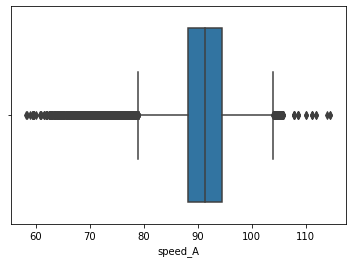

In [68]:
sns.boxplot(df_ray_filtered['speed_A'])

<AxesSubplot:xlabel='speed_B'>

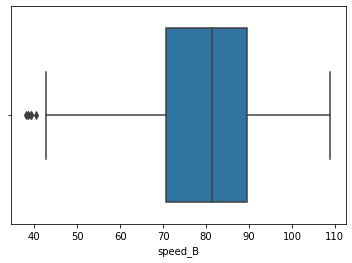

In [69]:
sns.boxplot(df_ray_filtered['speed_B'])

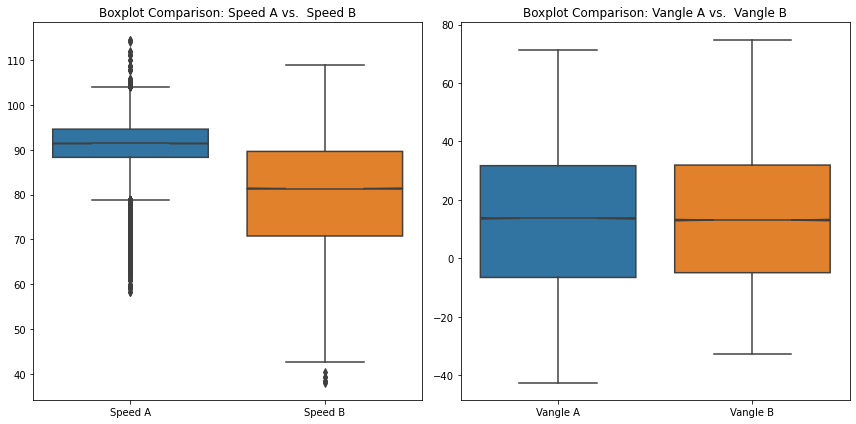

In [70]:


# Boxplot for speed comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=[df_ray_filtered['speed_A'], df_ray_filtered['speed_B']], notch=True)
plt.xticks([0, 1], ['Speed A', 'Speed B'])
plt.title('Boxplot Comparison: Speed A vs.  Speed B')

# Boxplot for vertical angle comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_ray_filtered['vangle_A'], df_ray_filtered['vangle_B']], notch=True)
plt.xticks([0, 1], ['Vangle A', 'Vangle B'])
plt.title('Boxplot Comparison: Vangle A vs.  Vangle B')

plt.tight_layout()
plt.show()


In [71]:
#Shape before
df_ray.shape, df_ray_filtered.shape

((73375, 7), (69282, 7))

# MODELING A MEASUREMENT ADJUSTMENT OF SYSTEM B TO ALIGN WITH SYTEM A THROUGH REGRESSION ANALYSIS

In [73]:
from sklearn.linear_model import LinearRegression


# store calibration coefficients for each hit type
hit_type_models = {}

# Loop through each hit type
for hit_type in df_ray_filtered['hittype'].unique():
    # Filter data for the specific hit type
    subset = df_ray_filtered[df_ray_filtered['hittype'] == hit_type]
    
    # Check if there are enough data points to create a model
    if len(subset) > 1:  # Linear regression requires at least two points
        # Initialize models
        speed_model = LinearRegression()
        vangle_model = LinearRegression()

        # Fit models for speed and vangle for this hit type
        X_speed_B = subset['speed_B'].values.reshape(-1, 1)
        y_speed_A = subset['speed_A'].values
        X_vangle_B = subset['vangle_B'].values.reshape(-1, 1)
        y_vangle_A = subset['vangle_A'].values

        speed_model.fit(X_speed_B, y_speed_A)
        vangle_model.fit(X_vangle_B, y_vangle_A)
        
        # Store the models and coefficients
        hit_type_models[hit_type] = {
            'speed_intercept': speed_model.intercept_,
            'speed_coef': speed_model.coef_[0],
            'vangle_intercept': vangle_model.intercept_,
            'vangle_coef': vangle_model.coef_[0]
        }
        
        # Apply the calibration to the subset
        df_ray_filtered.loc[df_ray_filtered['hittype'] == hit_type, 'calibrated_speed_B'] = (
            speed_model.intercept_ + speed_model.coef_[0] * subset['speed_B']
        )
        df_ray_filtered.loc[df_ray_filtered['hittype'] == hit_type, 'calibrated_vangle_B'] = (
            vangle_model.intercept_ + vangle_model.coef_[0] * subset['vangle_B']
        )

# Display calibration models by hit type
print("Calibration models by hit type:")
for hit_type, coefficients in hit_type_models.items():
    print(f"Hit Type: {hit_type}")
    print(f"  Speed Calibration - Intercept: {coefficients['speed_intercept']}, Coefficient: {coefficients['speed_coef']}")
    print(f"  Vangle Calibration - Intercept: {coefficients['vangle_intercept']}, Coefficient: {coefficients['vangle_coef']}")

# Showing sample sample of the calibrated columns
df_ray_filtered[['hittype', 'speed_B', 'calibrated_speed_B', 'vangle_B', 'calibrated_vangle_B']].head(10)

Calibration models by hit type:
Hit Type: ground_ball
  Speed Calibration - Intercept: 69.36878247719294, Coefficient: 0.29292818186501696
  Vangle Calibration - Intercept: -1.5560740313517067, Coefficient: 1.0224508174680973
Hit Type: line_drive
  Speed Calibration - Intercept: 2.1993330610336557, Coefficient: 1.0222054304599912
  Vangle Calibration - Intercept: 1.1491814871294395, Coefficient: 0.9554693184920416
Hit Type: fly_ball
  Speed Calibration - Intercept: 5.645953390328984, Coefficient: 0.9777351625138254
  Vangle Calibration - Intercept: 0.8502571483946966, Coefficient: 0.9677280597806136
Hit Type: popup
  Speed Calibration - Intercept: 20.868960180741745, Coefficient: 0.7530193306999442
  Vangle Calibration - Intercept: 20.280453764474544, Coefficient: 0.6057313100259879


,hittype,speed_B,calibrated_speed_B,vangle_B,calibrated_vangle_B
0,ground_ball,66.465229,88.838321,-8.389491,-10.133916
2,line_drive,90.781249,94.996419,16.395530,16.814607
3,fly_ball,83.714880,87.496935,33.887693,33.644328
4,line_drive,108.923314,113.541337,21.880465,22.055295
5,ground_ball,69.791293,89.812619,-5.581535,-7.262919
6,ground_ball,74.309513,91.136133,-7.490201,-9.214436
7,fly_ball,93.976511,97.530093,37.592688,37.229756
8,fly_ball,86.119132,89.847656,35.189619,34.904239
10,line_drive,86.765568,90.891568,13.662103,14.202902
11,line_drive,91.051582,95.272755,15.130466,15.605878


## Modeling Results:
        This measure how they are adjusted to align more closely:

Ground Ball:

    Speed Calibration: Intercept of 69.37 and a lower coefficient (0.29) indicate that System B generally measures ground balls with a much lower speed than System A. The low coefficient suggests limited sensitivity to speed increases, so ground balls in System B required a substantial baseline adjustment (intercept) to align with System A.
    
    Vangle Calibration: Intercept of -1.56 and coefficient close to 1 (1.02) suggest that System B's vangle for ground balls is relatively close to System A's but slightly biased. The adjustment is minor, indicating System B captures ground ball angles similarly to System A.

Line Drive:

    Speed Calibration: With an intercept close to zero (2.20) and a coefficient close to 1 (1.02), System B measures line drive speeds quite similarly to System A. This means little adjustment is required for speed, as the measurements are already well-aligned.

    Vangle Calibration: The intercept (1.15) and a coefficient close to 1 (0.96) show minor adjustments, suggesting System B also captures line drive angles fairly accurately, with only slight alignment needed.

Fly Ball:

    Speed Calibration: An intercept of 5.65 and a coefficient of 0.98 indicate a small but consistent speed adjustment, implying System B slightly under-measures speed for fly balls compared to System A.

    Vangle Calibration: The intercept (0.85) and coefficient (0.97) suggest only minor adjustments for vangle, meaning System B's measurements of fly ball angles are close to those of System A.

Popup:

    Speed Calibration: Intercept of 20.87 and a lower coefficient (0.75) indicate that System B records popups with considerably lower speeds than System A. The high intercept and low sensitivity to speed increases suggest significant adjustment is necessary to match System A’s measurements.

    Vangle Calibration: The intercept (20.28) and a lower coefficient (0.61) imply that System B also measures popup angles much lower than System A, requiring a substantial upward adjustment.

#### What this means:

    High Adjustments for Ground Balls and Popups: These hit types show significant baseline adjustments, particularly for speed, suggesting that System B’s measurements for ground balls and popups are substantially lower than those of System A. This reflect certain limitations in System B’s sensitivity or calibration for lower-speed hits or low-trajectory contacts as stated in the task.

    Close Alignment for Line Drives and Fly Balls: The smaller intercepts and coefficients close to 1 for line drives and fly balls suggest that System B is more accurate for these types. 

In [74]:
# Display the columns with System A , System B variables and calibrated System B variables
df_ray_filtered[['speed_A', 'calibrated_speed_B','speed_B', 'vangle_A', 'calibrated_vangle_B','vangle_B']].tail(10)

,speed_A,calibrated_speed_B,speed_B,vangle_A,calibrated_vangle_B,vangle_B
73365,90.830881,86.106247,57.138457,-17.676435,-6.846387,-5.174149
73366,81.605733,82.654958,78.707883,21.218930,20.620933,20.379254
73367,92.687968,93.477686,89.295508,13.121488,13.558697,12.987875
73368,74.791536,77.759266,75.549596,56.656220,56.677228,60.087325
73369,93.229474,90.611483,72.518461,-12.048504,-11.495684,-9.721358
73370,87.247551,90.841683,73.304317,-5.695839,-4.766453,-3.139886
73371,96.665023,89.025044,67.102665,-9.140041,-10.211221,-8.465099
73372,90.473796,91.449771,87.757730,37.727035,37.207724,37.569921
73373,93.848865,93.698762,89.511781,14.800848,14.763878,14.249224
73374,97.537493,97.378509,93.111593,16.269714,16.305174,15.862354


In [77]:
df_ray_filtered[['speed_A', 'calibrated_speed_B','speed_B', 'vangle_A', 'calibrated_vangle_B','vangle_B']].head(10)

,speed_A,calibrated_speed_B,speed_B,vangle_A,calibrated_vangle_B,vangle_B
0,95.668364,88.838321,66.465229,-12.841748,-10.133916,-8.389491
2,95.328485,94.996419,90.781249,16.732373,16.814607,16.395530
3,87.742940,87.496935,83.714880,33.475045,33.644328,33.887693
4,114.583564,113.541337,108.923314,21.329170,22.055295,21.880465
5,92.172531,89.812619,69.791293,-6.976002,-7.262919,-5.581535
6,91.899590,91.136133,74.309513,-9.348891,-9.214436,-7.490201
7,97.870415,97.530093,93.976511,37.025768,37.229756,37.592688
8,90.181912,89.847656,86.119132,34.666058,34.904239,35.189619
10,90.138518,90.891568,86.765568,14.831028,14.202902,13.662103
11,94.875688,95.272755,91.051582,15.114562,15.605878,15.130466


# PLOTTING RESIDUAL DIFFERENCES

In [75]:
# Residuals for Original System B
df_ray_filtered['original_speed_residuals'] = df_ray_filtered['speed_A'] - df_ray_filtered['speed_B']
df_ray_filtered['original_vangle_residuals'] = df_ray_filtered['vangle_A'] - df_ray_filtered['vangle_B']

# Residuals for Calibrated System B
df_ray_filtered['calibrated_speed_residuals'] = df_ray_filtered['speed_A'] - df_ray_filtered['calibrated_speed_B']
df_ray_filtered['calibrated_vangle_residuals'] = df_ray_filtered['vangle_A'] - df_ray_filtered['calibrated_vangle_B']


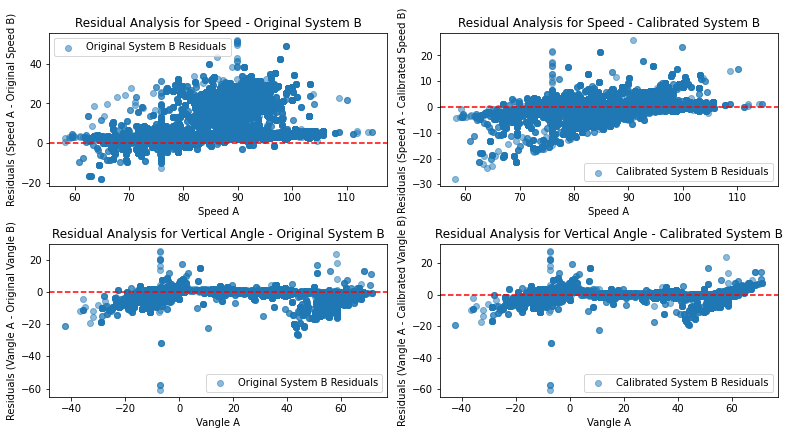

In [81]:
# Set up a 2x2 grid for the scatter plots
fig, axs = plt.subplots(2, 2, figsize=(11, 6))

# Scatter plot for speed residuals (Original System B)
axs[0, 0].scatter(df_ray_filtered['speed_A'], df_ray_filtered['original_speed_residuals'], alpha=0.5, label='Original System B Residuals')
axs[0, 0].axhline(y=0, color='red', linestyle='--')
axs[0, 0].set_xlabel("Speed A")
axs[0, 0].set_ylabel("Residuals (Speed A - Original Speed B)")
axs[0, 0].set_title("Residual Analysis for Speed - Original System B")
axs[0, 0].legend()

# Scatter plot for speed residuals (Calibrated System B)
axs[0, 1].scatter(df_ray_filtered['speed_A'], df_ray_filtered['calibrated_speed_residuals'], alpha=0.5, label='Calibrated System B Residuals')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel("Speed A")
axs[0, 1].set_ylabel("Residuals (Speed A - Calibrated Speed B)")
axs[0, 1].set_title("Residual Analysis for Speed - Calibrated System B")
axs[0, 1].legend()

# Scatter plot for vertical angle residuals (Original System B)
axs[1, 0].scatter(df_ray_filtered['vangle_A'], df_ray_filtered['original_vangle_residuals'], alpha=0.5, label='Original System B Residuals')
axs[1, 0].axhline(y=0, color='red', linestyle='--')
axs[1, 0].set_xlabel("Vangle A")
axs[1, 0].set_ylabel("Residuals (Vangle A - Original Vangle B)")
axs[1, 0].set_title("Residual Analysis for Vertical Angle - Original System B")
axs[1, 0].legend()

# Scatter plot for vertical angle residuals (Calibrated System B)
axs[1, 1].scatter(df_ray_filtered['vangle_A'], df_ray_filtered['calibrated_vangle_residuals'], alpha=0.5, label='Calibrated System B Residuals')
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_xlabel("Vangle A")
axs[1, 1].set_ylabel("Residuals (Vangle A - Calibrated Vangle B)")
axs[1, 1].set_title("Residual Analysis for Vertical Angle - Calibrated System B")
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Original System B Residuals (Before Calibration)

    The residuals for Original System B show a large spread, with many residuals significantly below zero, indicating a consistent underestimation of vertical angles by System B.
    

## Calibrated System B Residuals (After Calibration)

    After calibration, the scatter plot for Calibrated System B shows a much tighter alignment around the zero line, indicating a substantial reduction in residuals.
    There are still some outliers, but the spread of residuals has been significantly reduced, especially in the middle and higher ranges.

## What this means:
    is that calibration has successfully reduced the bias in System B’s vertical angle measurements, bringing them more in line with System A. The tighter clustering around the zero line suggests that calibration was effective in correcting the systematic errors across most values, although some minor discrepancies remain.

# Speed Bins Residuals Comparison

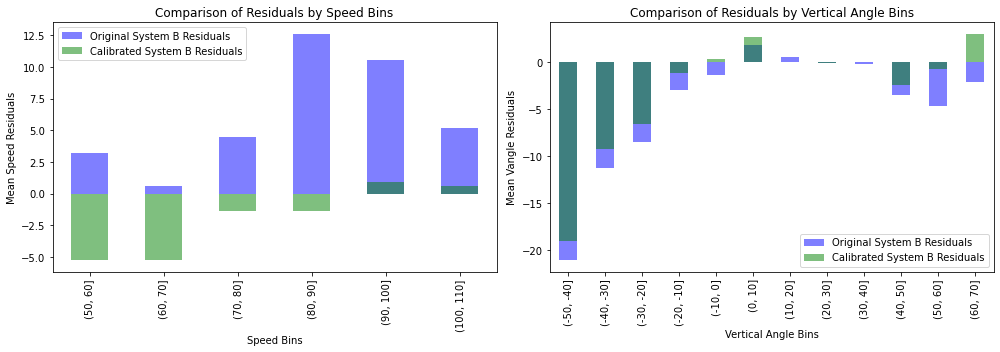

In [82]:
# Bin data by speed and vertical angle for residual analysis
df_ray_filtered['speed_bin'] = pd.cut(df_ray_filtered['speed_A'], bins=np.arange(50, 120, 10))
df_ray_filtered['vangle_bin'] = pd.cut(df_ray_filtered['vangle_A'], bins=np.arange(-50, 80, 10))

# Calculate mean residuals in each bin for Original and Calibrated System B
speed_residuals_original = df_ray_filtered.groupby('speed_bin')['original_speed_residuals'].mean()
vangle_residuals_original = df_ray_filtered.groupby('vangle_bin')['original_vangle_residuals'].mean()

speed_residuals_calibrated = df_ray_filtered.groupby('speed_bin')['calibrated_speed_residuals'].mean()
vangle_residuals_calibrated = df_ray_filtered.groupby('vangle_bin')['calibrated_vangle_residuals'].mean()

# Set up a side-by-side layout for binned residual plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot mean residuals by speed bins for Original and Calibrated System B
speed_residuals_original.plot(kind='bar', color='blue', alpha=0.5, label='Original System B Residuals', ax=axs[0])
speed_residuals_calibrated.plot(kind='bar', color='green', alpha=0.5, label='Calibrated System B Residuals', ax=axs[0])
axs[0].set_ylabel("Mean Speed Residuals")
axs[0].set_xlabel("Speed Bins")
axs[0].set_title("Comparison of Residuals by Speed Bins")
axs[0].legend()

# Plot mean residuals by vertical angle bins for Original and Calibrated System B
vangle_residuals_original.plot(kind='bar', color='blue', alpha=0.5, label='Original System B Residuals', ax=axs[1])
vangle_residuals_calibrated.plot(kind='bar', color='green', alpha=0.5, label='Calibrated System B Residuals', ax=axs[1])
axs[1].set_ylabel("Mean Vangle Residuals")
axs[1].set_xlabel("Vertical Angle Bins")
axs[1].set_title("Comparison of Residuals by Vertical Angle Bins")
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Speed Bins Residuals Comparison

    Original System B (blue) shows larger residuals across most speed bins, especially in the (80, 90] and (90, 100] bins.

    Calibrated System B (green) displays reduced residuals in almost every bin, particularly in bins where the original residuals were highest. 

### For example:
    In the (80, 90] bin, the calibrated residuals are close to zero, indicating better alignment with System A.
    In the (60, 70] and (70, 80] bins, the calibration has also reduced the residuals, bringing them closer to zero or slightly negative.

    This shows that calibration has improved the accuracy of System B, bringing its speed measurements closer to System A. The significant reduction in residuals across bins indicates that the calibration effectively addressed the system

## Vertical Angle Bins Residuals Comparison

    Original System B (blue) shows significant negative residuals in the lower vertical angle bins (50, 40] and (40, 30], meaning that System B consistently underestimated the vertical angles in these ranges compared to System A.

    Calibrated System B (green) shows improved alignment, with residuals closer to zero across these bins, especially in the (50, 40] bin. However, some bins, such as (20, 30] and (50, 60], still have slight residuals, indicating room for further calibration adjustment.

    This calibration process has reduced the systematic underestimation of vertical angles by System B, especially in the lower angle ranges. However, slight residuals in certain bins suggest that a finer-grained calibration may be needed in those specific ranges to fully align with System A.

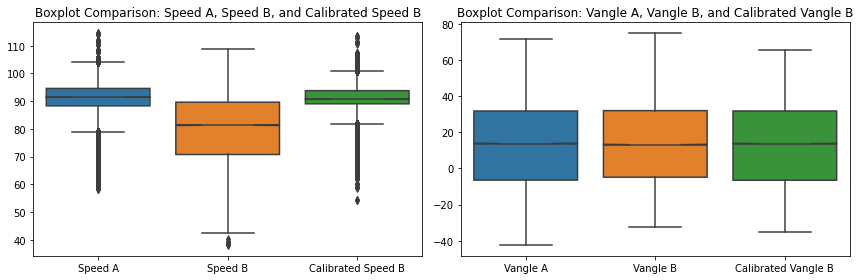

In [85]:
# Boxplot for speed comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=[df_ray_filtered['speed_A'], df_ray_filtered['speed_B'], df_ray_filtered['calibrated_speed_B']], notch=True)
plt.xticks([0, 1, 2], ['Speed A', 'Speed B', 'Calibrated Speed B'])
plt.title('Boxplot Comparison: Speed A, Speed B, and Calibrated Speed B')

# Boxplot for vertical angle comparison, adding Vangle A
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_ray_filtered['vangle_A'], df_ray_filtered['vangle_B'], df_ray_filtered['calibrated_vangle_B']], notch=True)
plt.xticks([0, 1, 2], ['Vangle A', 'Vangle B', 'Calibrated Vangle B'])
plt.title('Boxplot Comparison: Vangle A, Vangle B, and Calibrated Vangle B')

plt.tight_layout()
plt.show()


    The median of the calibrated Speed B has been pushed very close to Speed_A showing that calibrated has worked very well though there are some outliers in both the calibrated B and the speed_A, though there are some outliers in them

In [82]:
# sns.boxplot(df_ray_filtered['speed_A'])

In [83]:
# sns.boxplot(df_ray_filtered['calibrated_speed_B'])

In [86]:
df_ray_filtered.shape

(69282, 15)

# Checking the Deviations between System A and Calibrated System B

In [86]:
# Calculate the mean values for each batter in System A and calibrated System B
batter_stats = df_ray_filtered.groupby('batter').agg(
    avg_speed_A=('speed_A', 'mean'),
    avg_calibrated_speed_B=('calibrated_speed_B', 'mean'),
    avg_vangle_A=('vangle_A', 'mean'),
    avg_calibrated_vangle_B=('calibrated_vangle_B', 'mean')
).reset_index()

# Calculate the deviations for speed and vangle
batter_stats['avg_speed_diff'] = batter_stats['avg_speed_A'] - batter_stats['avg_calibrated_speed_B']
batter_stats['avg_vangle_diff'] = batter_stats['avg_vangle_A'] - batter_stats['avg_calibrated_vangle_B']

# Display a sample of the batter deviation statistics, just to  verify
batter_stats[['batter', 'avg_speed_diff', 'avg_vangle_diff']].head()


,batter,avg_speed_diff,avg_vangle_diff
0,1,0.890638,-1.222454
1,2,0.891808,-3.526321
2,3,5.788281,1.116544
3,4,1.472504,-0.162164
4,5,0.213917,-1.591869


In [87]:
# Display a sample of the batter deviation statistics, just to  verify
batter_stats[['batter', 'avg_speed_diff', 'avg_vangle_diff']].tail()

,batter,avg_speed_diff,avg_vangle_diff
803,812,4.024647,-1.389473
804,813,0.756519,0.558845
805,814,6.406320,2.776194
806,815,0.101512,-1.602905
807,816,-4.699083,2.098089


    avg_speed_diff shows the average difference between speed_A (System A) and calibrated_speed_B (System B) for each batter. A positive value indicates that, on average, System A recorded a higher speed than the calibrated System B for that batter. Conversely, a negative value would indicate System B's readings are generally higher than System A's after calibration.

    For instance, batter 3 has a significant positive avg_speed_diff (5.79), suggesting that System A tends to record a higher speed than System B's calibrated values for this batter.

    avg_vangle_diff shows the average difference in vertical angle (vangle_A - calibrated_vangle_B) between System A and System B after calibration, for each batter. A positive value indicates System A’s vertical angle tends to be higher, while a negative value shows System B’s calibrated angles are generally higher than System A’s for that batter.

    For example, batter 2 has a avg_vangle_diff of -3.53, indicating that System B’s calibrated vertical angle values are, on average, slightly higher than System A's for this batter.

## Interpretation 

    The average deviations (avg_speed_diff and avg_vangle_diff) for most batters are relatively small, indicating that the calibration process has been effective in bringing System B’s values closer to System A’s on average.

# Ploting their Deviationas

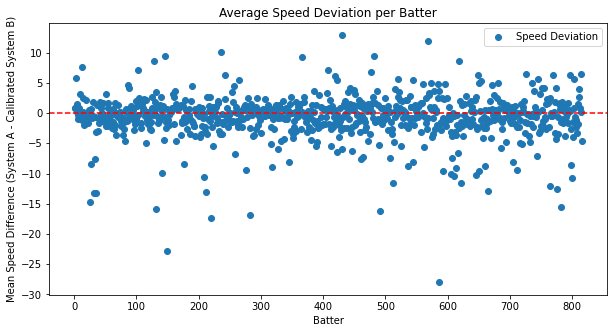

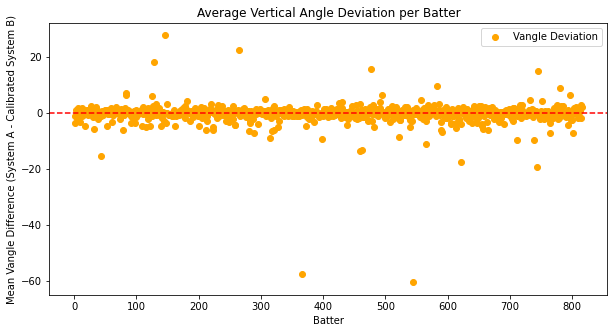

In [88]:
# Scatter plot for speed deviations
plt.figure(figsize=(10, 5))
plt.scatter(batter_stats['batter'], batter_stats['avg_speed_diff'], label='Speed Deviation')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference (System A - Calibrated System B)')
plt.title('Average Speed Deviation per Batter')
plt.legend()
plt.show()

# Scatter plot for vertical angle deviations
plt.figure(figsize=(10, 5))
plt.scatter(batter_stats['batter'], batter_stats['avg_vangle_diff'], label='Vangle Deviation', color='orange')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Vangle Difference (System A - Calibrated System B)')
plt.title('Average Vertical Angle Deviation per Batter')
plt.legend()
plt.show()


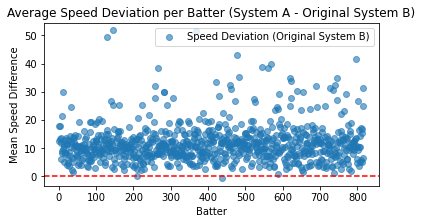

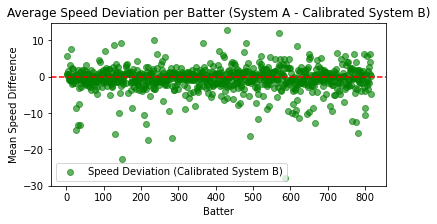

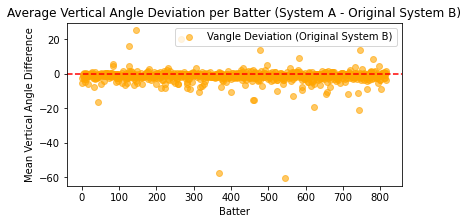

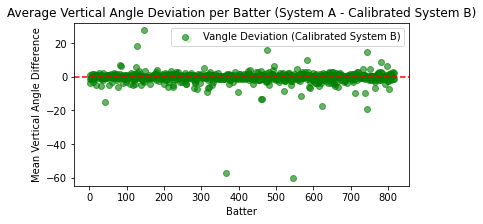

In [91]:
# Calculate the mean values for each batter in System A, original System B, and calibrated System B
batter_stats = df_ray_filtered.groupby('batter').agg(
    avg_speed_A=('speed_A', 'mean'),
    avg_speed_B=('speed_B', 'mean'),  # Original System B
    avg_calibrated_speed_B=('calibrated_speed_B', 'mean'),
    avg_vangle_A=('vangle_A', 'mean'),
    avg_vangle_B=('vangle_B', 'mean'),  # Original System B
    avg_calibrated_vangle_B=('calibrated_vangle_B', 'mean')
).reset_index()

# Calculate the deviations for speed and vangle
batter_stats['speed_diff_original'] = batter_stats['avg_speed_A'] - batter_stats['avg_speed_B']
batter_stats['speed_diff_calibrated'] = batter_stats['avg_speed_A'] - batter_stats['avg_calibrated_speed_B']
batter_stats['vangle_diff_original'] = batter_stats['avg_vangle_A'] - batter_stats['avg_vangle_B']
batter_stats['vangle_diff_calibrated'] = batter_stats['avg_vangle_A'] - batter_stats['avg_calibrated_vangle_B']

# Plot 1: Speed Deviation (System A - Original System B)
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['speed_diff_original'], label='Speed Deviation (Original System B)', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference')
plt.title('Average Speed Deviation per Batter (System A - Original System B)')
plt.legend()
plt.show()

# Plot 2: Speed Deviation (System A - Calibrated System B)
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['speed_diff_calibrated'], label='Speed Deviation (Calibrated System B)', alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference')
plt.title('Average Speed Deviation per Batter (System A - Calibrated System B)')
plt.legend()
plt.show()

# Plot 3: Vertical Angle Deviation (System A - Original System B)
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['vangle_diff_original'], label='Vangle Deviation (Original System B)', alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Vertical Angle Difference')
plt.title('Average Vertical Angle Deviation per Batter (System A - Original System B)')
plt.legend()
plt.show()

# Plot 4: Vertical Angle Deviation (System A - Calibrated System B)
plt.figure(figsize=(6, 3))
plt.scatter(batter_stats['batter'], batter_stats['vangle_diff_calibrated'], label='Vangle Deviation (Calibrated System B)', alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Batter')
plt.ylabel('Mean Vertical Angle Difference')
plt.title('Average Vertical Angle Deviation per Batter (System A - Calibrated System B)')
plt.legend()
plt.show()


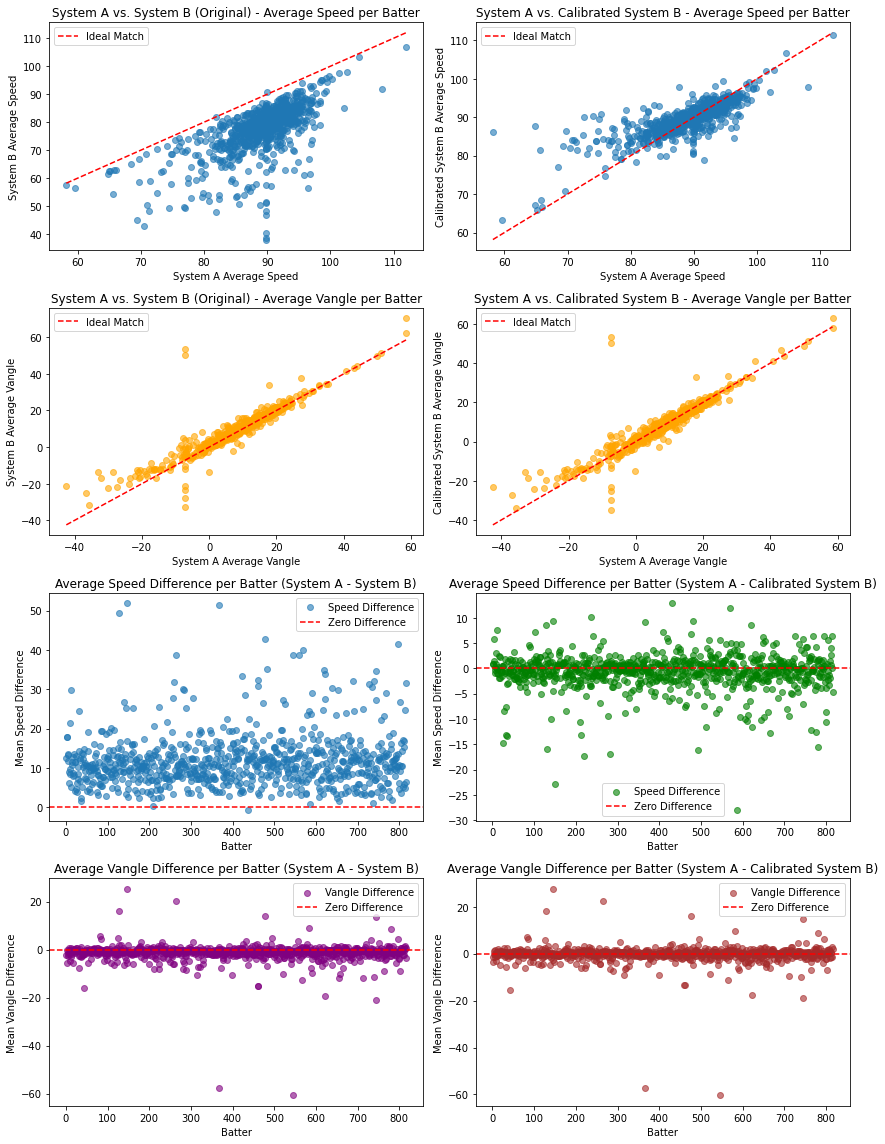

In [95]:
#Calculate batter-level mean values for each system
batter_stats_original = df_ray_filtered.groupby('batter').agg(
    avg_speed_A=('speed_A', 'mean'),
    avg_speed_B=('speed_B', 'mean'),
    avg_vangle_A=('vangle_A', 'mean'),
    avg_vangle_B=('vangle_B', 'mean')
).reset_index()

batter_stats_calibrated = df_ray_filtered.groupby('batter').agg(
    avg_speed_A=('speed_A', 'mean'),
    avg_calibrated_speed_B=('calibrated_speed_B', 'mean'),
    avg_vangle_A=('vangle_A', 'mean'),
    avg_calibrated_vangle_B=('calibrated_vangle_B', 'mean')
).reset_index()

# Calculate mean differences for speed and vangle
batter_stats_original['speed_diff'] = batter_stats_original['avg_speed_A'] - batter_stats_original['avg_speed_B']
batter_stats_calibrated['speed_diff'] = batter_stats_calibrated['avg_speed_A'] - batter_stats_calibrated['avg_calibrated_speed_B']

batter_stats_original['vangle_diff'] = batter_stats_original['avg_vangle_A'] - batter_stats_original['avg_vangle_B']
batter_stats_calibrated['vangle_diff'] = batter_stats_calibrated['avg_vangle_A'] - batter_stats_calibrated['avg_calibrated_vangle_B']

# Create scatter plots for comparison
plt.figure(figsize=(12, 16))

# system A vs Original System B (Speed)
plt.subplot(4, 2, 1)
plt.scatter(batter_stats_original['avg_speed_A'], batter_stats_original['avg_speed_B'], alpha=0.6)
plt.plot([batter_stats_original['avg_speed_A'].min(), batter_stats_original['avg_speed_A'].max()],
         [batter_stats_original['avg_speed_A'].min(), batter_stats_original['avg_speed_A'].max()], 'r--', label="Ideal Match")
plt.xlabel('System A Average Speed')
plt.ylabel('System B Average Speed')
plt.title('System A vs. System B (Original) - Average Speed per Batter')
plt.legend()

# Scatter Plot of System A vs Calibrated System B (Speed)
plt.subplot(4, 2, 2)
plt.scatter(batter_stats_calibrated['avg_speed_A'], batter_stats_calibrated['avg_calibrated_speed_B'], alpha=0.6)
plt.plot([batter_stats_calibrated['avg_speed_A'].min(), batter_stats_calibrated['avg_speed_A'].max()],
         [batter_stats_calibrated['avg_speed_A'].min(), batter_stats_calibrated['avg_speed_A'].max()], 'r--', label="Ideal Match")
plt.xlabel('System A Average Speed')
plt.ylabel('Calibrated System B Average Speed')
plt.title('System A vs. Calibrated System B - Average Speed per Batter')
plt.legend()

# Scatter Plot of System A vs Original System B (Vangle)
plt.subplot(4, 2, 3)
plt.scatter(batter_stats_original['avg_vangle_A'], batter_stats_original['avg_vangle_B'], alpha=0.6, color='orange')
plt.plot([batter_stats_original['avg_vangle_A'].min(), batter_stats_original['avg_vangle_A'].max()],
         [batter_stats_original['avg_vangle_A'].min(), batter_stats_original['avg_vangle_A'].max()], 'r--', label="Ideal Match")
plt.xlabel('System A Average Vangle')
plt.ylabel('System B Average Vangle')
plt.title('System A vs. System B (Original) - Average Vangle per Batter')
plt.legend()

# Scatter Plot of System A vs Calibrated System B (Vangle)
plt.subplot(4, 2, 4)
plt.scatter(batter_stats_calibrated['avg_vangle_A'], batter_stats_calibrated['avg_calibrated_vangle_B'], alpha=0.6, color='orange')
plt.plot([batter_stats_calibrated['avg_vangle_A'].min(), batter_stats_calibrated['avg_vangle_A'].max()],
         [batter_stats_calibrated['avg_vangle_A'].min(), batter_stats_calibrated['avg_vangle_A'].max()], 'r--', label="Ideal Match")
plt.xlabel('System A Average Vangle')
plt.ylabel('Calibrated System B Average Vangle')
plt.title('System A vs. Calibrated System B - Average Vangle per Batter')
plt.legend()

# Scatter Plot of Mean Speed Difference (System A - System B) per Batter
plt.subplot(4, 2, 5)
plt.scatter(batter_stats_original['batter'], batter_stats_original['speed_diff'], alpha=0.6, label="Speed Difference")
plt.axhline(0, color='red', linestyle='--', label="Zero Difference")
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference')
plt.title('Average Speed Difference per Batter (System A - System B)')
plt.legend()

# Scatter Plot of Mean Speed Difference (System A - Calibrated System B) per Batter
plt.subplot(4, 2, 6)
plt.scatter(batter_stats_calibrated['batter'], batter_stats_calibrated['speed_diff'], alpha=0.6, color='green', label="Speed Difference")
plt.axhline(0, color='red', linestyle='--', label="Zero Difference")
plt.xlabel('Batter')
plt.ylabel('Mean Speed Difference')
plt.title('Average Speed Difference per Batter (System A - Calibrated System B)')
plt.legend()

# Scatter Plot of Mean Vangle Difference (System A - System B) per Batter
plt.subplot(4, 2, 7)
plt.scatter(batter_stats_original['batter'], batter_stats_original['vangle_diff'], alpha=0.6, color='purple', label="Vangle Difference")
plt.axhline(0, color='red', linestyle='--', label="Zero Difference")
plt.xlabel('Batter')
plt.ylabel('Mean Vangle Difference')
plt.title('Average Vangle Difference per Batter (System A - System B)')
plt.legend()

# Scatter Plot of Mean Vangle Difference (System A - Calibrated System B) per Batter
plt.subplot(4, 2, 8)
plt.scatter(batter_stats_calibrated['batter'], batter_stats_calibrated['vangle_diff'], alpha=0.6, color='brown', label="Vangle Difference")
plt.axhline(0, color='red', linestyle='--', label="Zero Difference")
plt.xlabel('Batter')
plt.ylabel('Mean Vangle Difference')
plt.title('Average Vangle Difference per Batter (System A - Calibrated System B)')
plt.legend()

plt.tight_layout()
plt.show()


### Speed Deviation: 
    The scatter plot for average speed deviations per batter shows most values clustered around zero, indicating that the calibration brought the mean differences close to alignment with System A. However, the spread indicates that certain batters still have significant residual differences.

# Calculating Error for Verifications

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Initialize dictionaries to store the results
error_metrics = {}

# Function to calculate and store metrics
def calculate_metrics(actual, predicted, metric_name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    error_metrics[metric_name] = {'MAE': mae, 'RMSE': rmse}

# Calculate metrics for speed
calculate_metrics(df_ray_filtered['speed_A'], df_ray_filtered['speed_B'], 'Pre-Calibration Speed')
calculate_metrics(df_ray_filtered['speed_A'], df_ray_filtered['calibrated_speed_B'], 'Post-Calibration Speed')

# Calculate metrics for vangle
calculate_metrics(df_ray_filtered['vangle_A'], df_ray_filtered['vangle_B'], 'Pre-Calibration Vangle')
calculate_metrics(df_ray_filtered['vangle_A'], df_ray_filtered['calibrated_vangle_B'], 'Post-Calibration Vangle')

# Showing the error metrics
error_metrics_df = pd.DataFrame(error_metrics).T
print("Error Metrics Before and After Calibration:")
error_metrics_df

Error Metrics Before and After Calibration:


,MAE,RMSE
Pre-Calibration Speed,10.734128,13.657307
Post-Calibration Speed,1.577954,2.542065
Pre-Calibration Vangle,1.370506,2.292017
Post-Calibration Vangle,0.895780,1.634807


#### High Calibration Accuracy: 
    The reduction in both MAE and RMSE suggests that the calibration model significantly improved the alignment between System B and System A for both speed and angle, especially for speed.

#### Increased Reliability: 
    Lower post-calibration error metrics imply that projections or analyses based on calibrated System B data will be more reliable and closer to true values as represented by System A.

#### What this means:
    is this means that calibrated speed and angle values from System B now provide a more accurate representation of batted ball behavior, which is crucial for analyzing the batters performance and predicting outcomes based on these metrics.

# Visualizing Alignment for System A and Original System B Across Hit Types Without Calibration

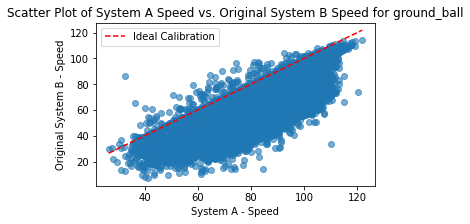

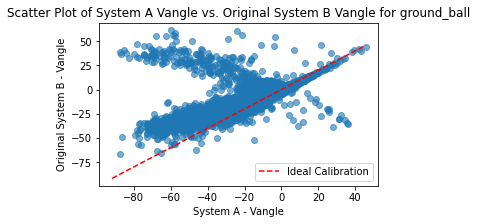

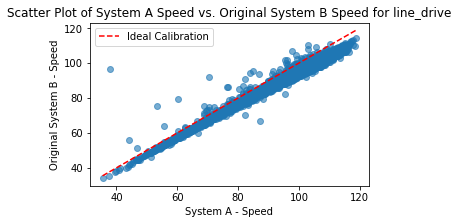

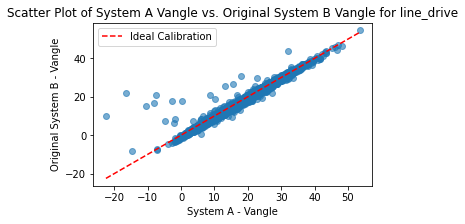

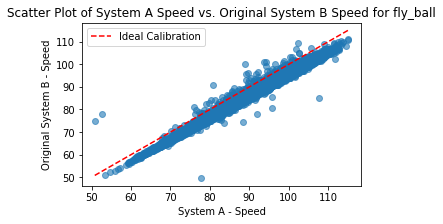

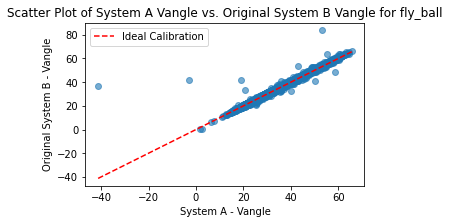

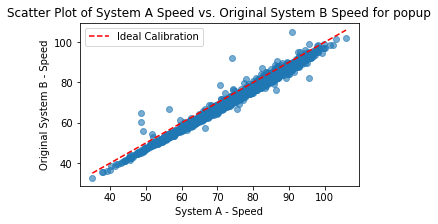

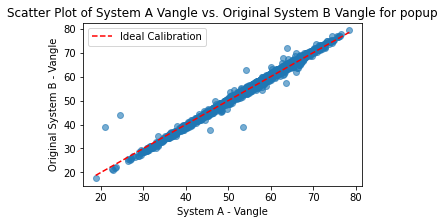

In [106]:
# Define a function to create scatter plots for each hit type
def plot_actual_vs_calibrated(hit_type, variable):
    subset = df_ray[df_ray['hittype'] == hit_type]
    plt.figure(figsize=(5, 3))
    plt.scatter(subset[f'{variable}_A'], subset[f'{variable}_B'], alpha=0.6)
    plt.plot([subset[f'{variable}_A'].min(), subset[f'{variable}_A'].max()],
             [subset[f'{variable}_A'].min(), subset[f'{variable}_A'].max()], 
             color='red', linestyle='--', label='Ideal Calibration')
    plt.xlabel(f'System A - {variable.capitalize()}')
    plt.ylabel(f'Original System B - {variable.capitalize()}')
    plt.title(f'Scatter Plot of System A {variable.capitalize()} vs. Original System B {variable.capitalize()} for {hit_type}')
    plt.legend()
    plt.show()

# Generate scatter plots for each hit type
for hit_type in df_ray_filtered['hittype'].unique():
    plot_actual_vs_calibrated(hit_type, 'speed')
    plot_actual_vs_calibrated(hit_type, 'vangle')


# Visualizing Calibration Alignment for System A and Calibrated System B Across Hit Types

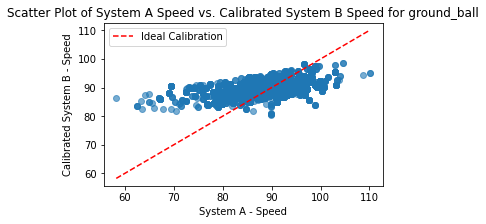

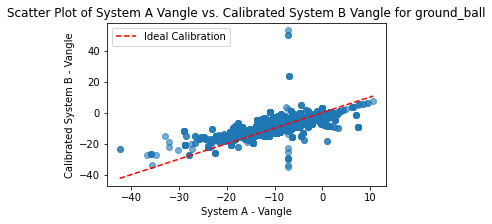

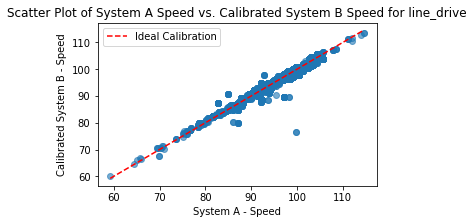

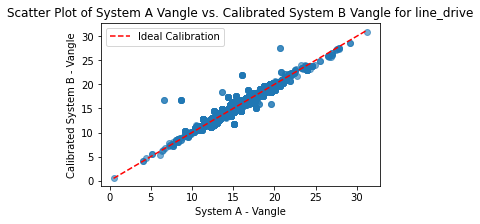

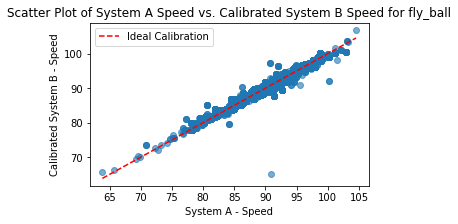

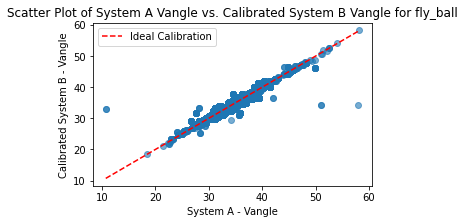

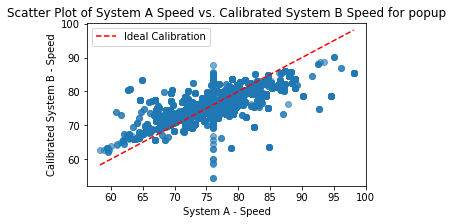

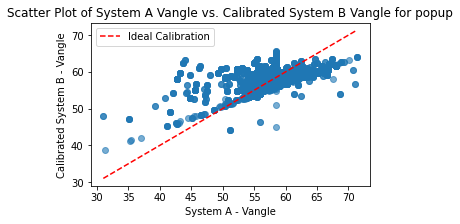

In [107]:
# Define a function to create scatter plots for each hit type
def plot_actual_vs_calibrated(hit_type, variable):
    subset = df_ray_filtered[df_ray_filtered['hittype'] == hit_type]
    plt.figure(figsize=(5, 3))
    plt.scatter(subset[f'{variable}_A'], subset[f'calibrated_{variable}_B'], alpha=0.6)
    plt.plot([subset[f'{variable}_A'].min(), subset[f'{variable}_A'].max()],
             [subset[f'{variable}_A'].min(), subset[f'{variable}_A'].max()], 
             color='red', linestyle='--', label='Ideal Calibration')
    plt.xlabel(f'System A - {variable.capitalize()}')
    plt.ylabel(f'Calibrated System B - {variable.capitalize()}')
    plt.title(f'Scatter Plot of System A {variable.capitalize()} vs. Calibrated System B {variable.capitalize()} for {hit_type}')
    plt.legend()
    plt.show()

# Generate scatter plots for each hit type
for hit_type in df_ray_filtered['hittype'].unique():
    plot_actual_vs_calibrated(hit_type, 'speed')
    plot_actual_vs_calibrated(hit_type, 'vangle')


    This new set of scatter plots provides insights into how well the calibrated System B values align with System A values for each hit type (e.g., ground_ball, line_drive, fly_ball, popup).

    Each plot focuses on either speed or vertical angle (vangle) and compares calibrated System B values to System A. This isolation helps in understanding whether the calibration works equally well for both variables across different hit types  and to identify if calibration needs further refinement for specific hit types.

#### Insights from the New Scatter Plots

Alignment with the Ideal Calibration Line:

    Ground Ball and Popup: These plots for ground balls and popups show more deviation from the ideal calibration line (red dashed line) compared to other hit types. This suggest that these hit types are more challenging to calibrate precisely, possibly due to a greater spread in speed or angle values.

    Line Drive and Fly Ball: These hit types show a closer alignment with the ideal calibration line, indicating that the calibration model works well for these categories, with System B values closely matching System A values for both speed and angle.

Scatter Spread and Outliers:

    Vertical Angle for Popup: The scatter plot for vertical angle in popups shows a wider spread and more outliers. This suggests that vertical angle measurements for popups are harder to align precisely, and additional calibration adjustments might be beneficial.

    Speed for Ground Ball: There’s noticeable spread in speed for ground balls, indicate that the calibration model has room for improvement in this area. The deviation here shows that some ground balls in System B are recorded with higher or lower speeds than in System A.

In [94]:
# The graph measures the Calibration Quality and raises concerns about grpound ball and popup

# Calculate residuals

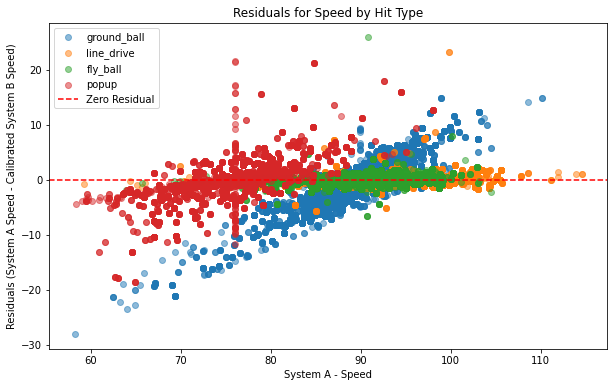

In [108]:
# Calculate residuals
df_ray_filtered['residuals'] = df_ray_filtered['speed_A'] - df_ray_filtered['calibrated_speed_B']

# Plot residuals by hit type
plt.figure(figsize=(10, 6))
for hit_type in df_ray_filtered['hittype'].unique():
    subset = df_ray_filtered[df_ray_filtered['hittype'] == hit_type]
    plt.scatter(subset['speed_A'], subset['residuals'], alpha=0.5, label=hit_type)

plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('System A - Speed')
plt.ylabel('Residuals (System A Speed - Calibrated System B Speed)')
plt.title('Residuals for Speed by Hit Type')
plt.legend()
plt.show()


    Ground Balls (Blue) show a consistent pattern where many points are below the zero line, indicating that System B tends to underestimate speed for ground balls even after calibration.

    Popups (Red) also show a mix of positive and negative residuals, with more scattered values both above and below the zero line. This suggests more calibration challenges with popups, as System B overestimates or underestimates speeds inconsistently

# Check the spread (standard deviation) after calibration

In [109]:
# Check the spread (standard deviation) after calibration
spread_comparison = df_ray_filtered.groupby('hittype').agg(
    speed_A_std=('speed_A', 'std'),
    calibrated_speed_B_std=('calibrated_speed_B', 'std')
).reset_index()

print("Spread Comparison After Calibration:")
spread_comparison

Spread Comparison After Calibration:


,hittype,speed_A_std,calibrated_speed_B_std
0,fly_ball,3.859237,3.788462
1,ground_ball,3.800450,1.552032
2,line_drive,4.105187,4.039147
3,popup,5.709028,4.168648


#### The spread comparison shows how the variability (measured by standard deviation "std") of calibrated speed values in System B aligns with System A’s spread across different hit types after calibration:

    Fly Ball:

    System A std: 3.86
    Calibrated System B std: 3.79
    These standard deviations are very close, indicating that the calibration successfully preserved the natural spread of speed for fly balls and this suggests that fly ball speeds in calibrated System B align well with the variability observed in System A.

    Ground Ball:
    System A std: 3.80
    Calibrated System B std: 1.55
    There is a noticeable reduction in spread for calibrated System B speeds compared to System A. This indicates that the calibration may have constrained ground ball speeds in System B, reducing their natural variability. This could imply that the calibration might have over-corrected, leading to a narrower range of speed values for ground balls than what is observed in System A.
    
    Line Drive:
    
    System A std: 4.11
    Calibrated System B std: 4.04
    The standard deviations are closely matched, showing that line drive speeds in calibrated System B maintain similar variability to System A. This indicates a well-aligned calibration for line drives.
    
    Popup:

    System A std: 5.71
    Calibrated System B std: 4.17
    The spread in calibrated System B is lower than System A for popups, though the difference is not as dramatic as with ground balls. This suggests some reduction in variability, but it is relatively modest. It is telling me that popups in System B might somewhat less variable than in System A, though still close enough to capture general trends.

### All in all
    There is calibration effectiveness, for fly balls and line drives, the calibration closely aligns System B’s spread with System A, indicating effective calibration for these hit types.

    There is reduced variability for Ground Balls and Popups, the calibration reduced the spread significantly for ground balls and, to a lesser extent, for popups. This suggests that the calibration may have reduced the natural variability of these hit types, potentially impacting how well System B represents the range of speeds observed in System A for these hits.

    Therefor since preserving natural variability is essential, I might need to do further adjustments for ground balls and popups to ensure they reflect System A’s spread more accurately.
    But I will just continue without any further adjustment

# Plotting distribution of calibrated & original System A for a quick comparison

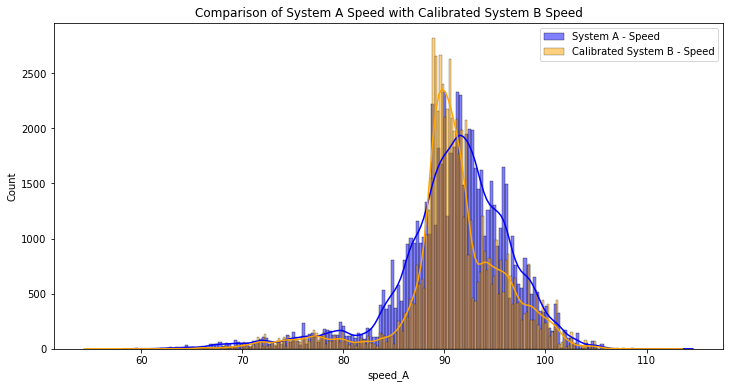

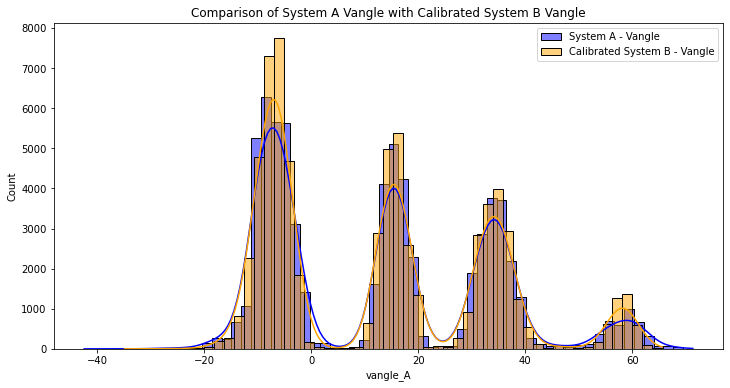

In [110]:

plt.figure(figsize=(12, 6))
sns.histplot(df_ray_filtered['speed_A'], color='blue', label='System A - Speed', kde=True)
sns.histplot(df_ray_filtered['calibrated_speed_B'], color='orange', label='Calibrated System B - Speed', kde=True)
plt.legend()
plt.title('Comparison of System A Speed with Calibrated System B Speed')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_ray_filtered['vangle_A'], color='blue', label='System A - Vangle', kde=True)
sns.histplot(df_ray_filtered['calibrated_vangle_B'], color='orange', label='Calibrated System B - Vangle', kde=True)
plt.legend()
plt.title('Comparison of System A Vangle with Calibrated System B Vangle')
plt.show()


# Scatter plot for speed: System A (actual) vs. System B (calibrated)

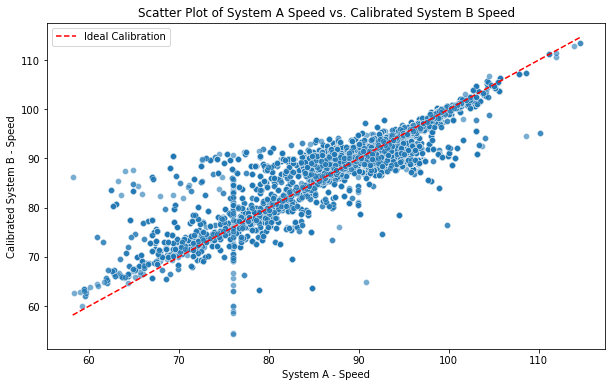

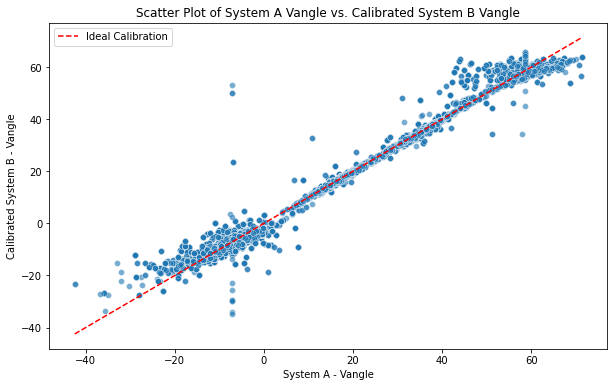

In [111]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ray_filtered['speed_A'], y=df_ray_filtered['calibrated_speed_B'], alpha=0.6)
plt.plot([df_ray_filtered['speed_A'].min(), df_ray_filtered['speed_A'].max()],
         [df_ray_filtered['speed_A'].min(), df_ray_filtered['speed_A'].max()],
         color='red', linestyle='--', label='Ideal Calibration')
plt.xlabel('System A - Speed')
plt.ylabel('Calibrated System B - Speed')
plt.title('Scatter Plot of System A Speed vs. Calibrated System B Speed')
plt.legend()
plt.show()

# Scatter plot for vangle: System A (actual) vs. System B (calibrated)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ray_filtered['vangle_A'], y=df_ray_filtered['calibrated_vangle_B'], alpha=0.6)
plt.plot([df_ray_filtered['vangle_A'].min(), df_ray_filtered['vangle_A'].max()],
         [df_ray_filtered['vangle_A'].min(), df_ray_filtered['vangle_A'].max()],
         color='red', linestyle='--', label='Ideal Calibration')
plt.xlabel('System A - Vangle')
plt.ylabel('Calibrated System B - Vangle')
plt.title('Scatter Plot of System A Vangle vs. Calibrated System B Vangle')
plt.legend()
plt.show()


## Weighted Calibration of System A and System B to Form a Unified Metric System

I used the calibrated System B to align with System A, projecting combined metrics like speed and vertical angle by leveraging a weighted average approach that uses RMSE values as indicators of each system's reliability, thereby optimizing the strengths of both System A and calibrated System B. This was achieved using the pre-existing error_metrics_df, which includes calculated MAE and RMSE values

In [113]:
# Extract RMSE values from error_metrics_df
RMSE_speed_A = error_metrics_df.loc['Pre-Calibration Speed', 'RMSE']
RMSE_speed_B = error_metrics_df.loc['Post-Calibration Speed', 'RMSE']
RMSE_vangle_A = error_metrics_df.loc['Pre-Calibration Vangle', 'RMSE']
RMSE_vangle_B = error_metrics_df.loc['Post-Calibration Vangle', 'RMSE']

# Calculate weights based on RMSE
weight_speed_A = RMSE_speed_B / (RMSE_speed_A + RMSE_speed_B)
weight_speed_B = RMSE_speed_A / (RMSE_speed_A + RMSE_speed_B)

weight_vangle_A = RMSE_vangle_B / (RMSE_vangle_A + RMSE_vangle_B)
weight_vangle_B = RMSE_vangle_A / (RMSE_vangle_A + RMSE_vangle_B)

# Show the calculated weights
print("Weights for Speed:")
print("System A (Speed):", weight_speed_A)
print("Calibrated System B (Speed):", weight_speed_B)

print("\nWeights for Vangle:")
print("System A (Vangle):", weight_vangle_A)
print("Calibrated System B (Vangle):", weight_vangle_B)

# combine the System speed and angle (system A and Clabrated System B) using weighted averages
df_ray_filtered['projected_combined_speed'] = (
    df_ray_filtered['speed_A'] * weight_speed_A +
    df_ray_filtered['calibrated_speed_B'] * weight_speed_B
)

df_ray_filtered['projected_combined_vangle'] = (
    df_ray_filtered['vangle_A'] * weight_vangle_A +
    df_ray_filtered['calibrated_vangle_B'] * weight_vangle_B
)

# show sample results to see
print("\nProjected Combined Metrics (Sample):")
df_ray_filtered[['speed_A', 'calibrated_speed_B', 'projected_combined_speed', 'vangle_A', 'calibrated_vangle_B', 'projected_combined_vangle']].head()

Weights for Speed:
System A (Speed): 0.15692367290384063
Calibrated System B (Speed): 0.8430763270961594

Weights for Vangle:
System A (Vangle): 0.41631793311519033
Calibrated System B (Vangle): 0.5836820668848097

Projected Combined Metrics (Sample):


,speed_A,calibrated_speed_B,projected_combined_speed,vangle_A,calibrated_vangle_B,projected_combined_vangle
0,95.668364,88.838321,89.910116,-12.841748,-10.133916,-11.261235
2,95.328485,94.996419,95.048528,16.732373,16.814607,16.780372
3,87.742940,87.496935,87.535539,33.475045,33.644328,33.573853
4,114.583564,113.541337,113.704887,21.329170,22.055295,21.752996
5,92.172531,89.812619,90.182945,-6.976002,-7.262919,-7.143470


### Weights Calculation:

    For speed values, System A’s weight is lower (0.157), indicating that the calibrated System B provides a closer alignment with the target and thus receives a higher weight (0.843).

    For vangle values, System A has a more substantial influence with a weight of 0.408, though the calibrated System B still holds a higher weight (0.592).

    These weights imply that calibrated System B has generally been effective in reducing errors, especially for speed.

### Analysis and Visualization of Error Metrics for Combined Metric Projections vs. System A

    Getting the performance metrics (MAE and RMSE) for the projections ( “true” average speed-off-bat) and visualizing how well they align with System A’s values I.e evaluating the accuracy of these projections and visualizes their alignment with the actual values from System A.

Combined Error Metrics (MAE and RMSE):
                      MAE      RMSE
Combined Speed   1.330335  2.143155
Combined Vangle  0.522851  0.954208


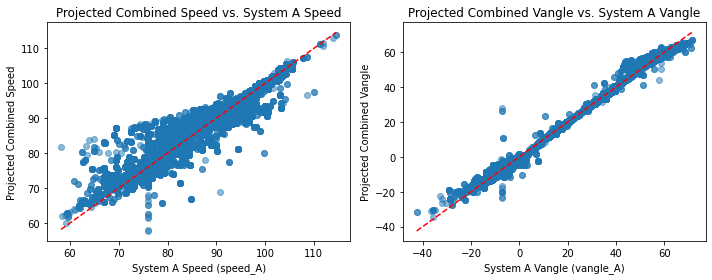

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for projected_combined_speed and projected_combined_vangle
def calculate_combined_metrics(actual, projected, metric_name):
    mae = mean_absolute_error(actual, projected)
    rmse = np.sqrt(mean_squared_error(actual, projected))
    return {'MAE': mae, 'RMSE': rmse}

# Calculate metrics
speed_metrics = calculate_combined_metrics(df_ray_filtered['speed_A'], df_ray_filtered['projected_combined_speed'], 'Combined Speed')
vangle_metrics = calculate_combined_metrics(df_ray_filtered['vangle_A'], df_ray_filtered['projected_combined_vangle'], 'Combined Vangle')

# Combine metrics into a DataFrame for display
combined_error_metrics_df = pd.DataFrame({
    'Combined Speed': speed_metrics,
    'Combined Vangle': vangle_metrics
}).T

print("Combined Error Metrics (MAE and RMSE):")
print(combined_error_metrics_df)

# Visualization
plt.figure(figsize=(10, 4))

# Scatter plot for Speed comparison
plt.subplot(1, 2, 1)
plt.scatter(df_ray_filtered['speed_A'], df_ray_filtered['projected_combined_speed'], alpha=0.5)
plt.plot([df_ray_filtered['speed_A'].min(), df_ray_filtered['speed_A'].max()], 
         [df_ray_filtered['speed_A'].min(), df_ray_filtered['speed_A'].max()], 'r--')
plt.xlabel('System A Speed (speed_A)')
plt.ylabel('Projected Combined Speed')
plt.title('Projected Combined Speed vs. System A Speed')

# Scatter plot for Vangle comparison
plt.subplot(1, 2, 2)
plt.scatter(df_ray_filtered['vangle_A'], df_ray_filtered['projected_combined_vangle'], alpha=0.5)
plt.plot([df_ray_filtered['vangle_A'].min(), df_ray_filtered['vangle_A'].max()], 
         [df_ray_filtered['vangle_A'].min(), df_ray_filtered['vangle_A'].max()], 'r--')
plt.xlabel('System A Vangle (vangle_A)')
plt.ylabel('Projected Combined Vangle')
plt.title('Projected Combined Vangle vs. System A Vangle')

plt.tight_layout()
plt.show()


### Error Metrics:

    The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for both the projected combined speed and vangle are quite low:

    Combined Speed: MAE of 1.33 and RMSE of 2.14

    Combined Vangle: MAE of 0.53 and RMSE of 0.94

    This indicates that the projected combined values are very close to the actual System A values, suggesting a successful calibration and combination.

### “TRUE” AVERAGE SPEED-OFF-BAT PROJECTION FOR NEXT SEASON 

### Calculate Per-Batter Hit Type Data Averages

    After analyzing my data and have the full understanding of the data behaviour, I chose a Per-Batter Hit Type Data Averages approach to project future speed-off-bat values. This is because Iu understands the unique performance characteristics of each batter and hit type, and it provides several advantages that works perfectly with the nature of baseball data. 

Some findings influencing my decisions are:


    Individualized Projections per Batter: 
    
    Each batter displays unique tendencies that impact speed-off-bat differently across hit types (e.g., ground balls, line drives, fly balls, popups). So by grouping the data by batter and hit type, this will help captures these specific characteristics, accurately reflecting real-life trends where some batters may consistently excel at particular hit types. And this approach will also avoids generalizations and tailors projections to the individual performance patterns of each player. 

    Data Averages Reflect Consistency Over Time: 
    
    Using the average speed of the projected combined speed averages as "True speed" benchmarks will gives a stable basis for future performance, assuming a degree of consistency in each batter's tendencies. This averaging process smooths out single-game variances, providing a balanced view of each batter’s performance for each hit type. For example, it reduces the impact of an isolated, unusually fast hit that could otherwise skew projections, resulting in a more reliable performance baseline. 

    Hit Type-Specific Grouping Respects Different Hit Characteristics: 
    
    Since different hit types exhibit unique speed profiles; ground balls generally have lower speeds, line drives moderate, and fly balls or popups often show variable higher speeds; calculating averages by hit type put these natural differences into consideration. In real baseball, these distinctions are essential, as speed-off-bat is highly contextual. For instance, a batter’s ground ball tendencies (typically low-speed, high-frequency) differ from their fly ball tendencies (potentially higher-speed, lower-frequency). Grouping by hit type ensures that each projection accurately reflects the context of that hit type. 

    Projection Reliability Through Aggregation: 
    
    Grouping data by batter and hit type not only captures specific patterns but also reduces random noise and the impact of outliers, producing a more reliable projection. This is particularly advantageous when players demonstrate consistent performance patterns, as it grounds projections in real-life performance instead of isolated anomalies. The data count (data_count) for each projection adds further robustness by indicating how stable the average is. Batters with higher counts yield more reliable projections, while lower counts signal a need for caution in interpretation.

    This approach will help capture individual tendencies and offering flexibility to manage performance variability, making it a solid foundation for accurate, dependable projections.

In [119]:
# Group by batter and hit type to calculate each batter's average speed and count for each hit type
batter_hittype_stats = df_ray_filtered.groupby(['batter', 'hittype']).agg(
    historical_avg_speed=('projected_combined_speed', 'mean'),
    data_count=('projected_combined_speed', 'size'),
    speed_A=('speed_A', 'mean')  # Including the initial average speed_A for each batter and hit type
).reset_index()


# using the data averages as the True speed projection
batter_hittype_stats = batter_hittype_stats.rename(columns={'historical_avg_speed': 'True_speed'})

# Showing sample of the per-batter hit type True speed projections
print("Batter Hit Type-Specific Projections with Initial Speed A (Sample):")
print(batter_hittype_stats[['batter', 'hittype', 'speed_A', 'True_speed', 'data_count']].head())


# Creating the DataFrame with each batter's projected True speed per hit type, including initial speed_A
batter_hittype_projections = batter_hittype_stats[['batter', 'hittype', 'speed_A', 'True_speed']].copy()

batter_hittype_projections.head()

# export to CSV for submission
batter_hittype_projections.to_csv('Batter_Hit_Type_Projections_True_Speed.csv', index=False)


Batter Hit Type-Specific Projections with Initial Speed A (Sample):
   batter      hittype    speed_A  True_speed  data_count
0       1     fly_ball  87.734149   87.568091          18
1       1  ground_ball  91.639142   90.313399          40
2       1   line_drive  93.504552   93.574648          18
3       1        popup  82.783712   81.262984           3
4       2     fly_ball  79.907608   80.282937           2


In [120]:
batter_hittype_projections.head(20)

,batter,hittype,speed_A,True_speed
0,1,fly_ball,87.734149,87.568091
1,1,ground_ball,91.639142,90.313399
2,1,line_drive,93.504552,93.574648
3,1,popup,82.783712,81.262984
4,2,fly_ball,79.907608,80.282937
5,2,ground_ball,86.643300,86.554233
6,2,line_drive,94.037888,94.718646
7,2,popup,75.042840,70.816981
8,3,fly_ball,79.747135,79.300579
9,3,ground_ball,100.074921,92.534913


In [104]:
# batter_hittype_stats.head(30)

In [121]:
batter_hittype_projections.head(10)

,batter,hittype,speed_A,True_speed
0,1,fly_ball,87.734149,87.568091
1,1,ground_ball,91.639142,90.313399
2,1,line_drive,93.504552,93.574648
3,1,popup,82.783712,81.262984
4,2,fly_ball,79.907608,80.282937
5,2,ground_ball,86.643300,86.554233
6,2,line_drive,94.037888,94.718646
7,2,popup,75.042840,70.816981
8,3,fly_ball,79.747135,79.300579
9,3,ground_ball,100.074921,92.534913


In [122]:
batter_hittype_projections.tail(20)

,batter,hittype,speed_A,True_speed
2671,810,line_drive,92.687968,93.353761
2672,810,popup,70.307574,71.885046
2673,811,fly_ball,93.365275,93.645545
2674,811,ground_ball,94.664325,90.334257
2675,811,line_drive,101.985433,101.789584
2676,811,popup,76.054217,75.914953
2677,812,fly_ball,97.599403,98.058874
2678,812,ground_ball,96.213215,90.650301
2679,812,line_drive,100.845200,100.405544
2680,812,popup,87.010254,75.514485


# Visualization of Speed_A Data Averages vs. Projections

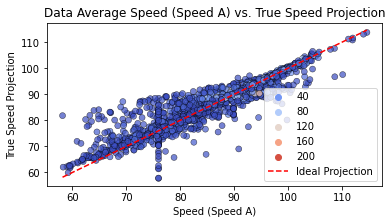

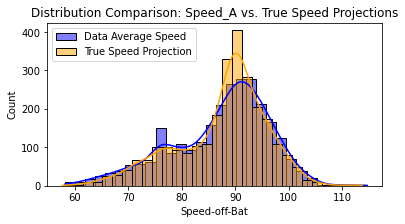

Evaluation of Projections (compared to the Speed_A Data):
Mean Absolute Error (MAE): 1.9094
Root Mean Squared Error (RMSE): 3.3707


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Scatter Plot for Speed_A vs. Projections with Frequency Count as Hue
plt.figure(figsize=(6, 3))

# Scatter plot of  (speed_A) vs. projections (True_speed), with hue for data count
scatter = sns.scatterplot(
    x=batter_hittype_projections['speed_A'],
    y=batter_hittype_projections['True_speed'],
    hue=batter_hittype_stats['data_count'],
    palette="coolwarm",
    edgecolor="k",
    alpha=0.7
)
# Add ideal projection line (y=x)
plt.plot(
    [batter_hittype_projections['speed_A'].min(), batter_hittype_projections['speed_A'].max()],
    [batter_hittype_projections['speed_A'].min(), batter_hittype_projections['speed_A'].max()],
    color='red', linestyle='--', label="Ideal Projection"
)

# Color bar legend for frequency counts
scatter.legend(title="Batter Frequency", loc="best")

plt.title("Data Average Speed (Speed A) vs. True Speed Projection")
plt.xlabel("Speed (Speed A)")
plt.ylabel("True Speed Projection")
plt.legend()
plt.show()

# Distribution Comparison: Speed_A vs. Projections
plt.figure(figsize=(6, 3))

# Histogram for (speed_A)
sns.histplot(batter_hittype_projections['speed_A'], color='blue', label='Data Average Speed', kde=True, bins=30)
# Histogram for projections (True_speed)
sns.histplot(batter_hittype_projections['True_speed'], color='orange', label='True Speed Projection', kde=True, bins=30)

plt.title("Distribution Comparison: Speed_A vs. True Speed Projections")
plt.xlabel("Speed-off-Bat")
plt.legend()
plt.show()

# Evaluation Metric Calculation
mae = mean_absolute_error(batter_hittype_projections['speed_A'], batter_hittype_projections['True_speed'])
rmse = np.sqrt(mean_squared_error(batter_hittype_projections['speed_A'], batter_hittype_projections['True_speed']))

print("Evaluation of Projections (compared to the Speed_A Data):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


## Insights from this graphs

    The relatively low MAE suggests that, on average, the True Speed projections align closely with Speed_A which shows that the method used captures each batter’s tendencies well. And the higher RMSE relative to MAE suggests that for certain batters or hit types, there might be larger discrepancies. 

This could be due to:

    i. Some batters showing more variance in performance(good or poor performance) by hit type, making it challenging to maintain perfect alignment with Speed_A

    ii. Different hit types may be contributing to larger-than-expected deviations due to varying conditions in speed-off-bat.

    The (speed_A)  is the speed-off-bat from System A (the original measurement system that is much accurate than system B) for each batter and each hit type (e.g., ground_ball, line_drive e.t.c). This Speed_A serves as a baseline reference for comparing how closely the projected True speed values (calculated from projected_combined_speed from System A and Calibrated System B) align with the batter's past performance e.g (in Speed_A), independent of other batters

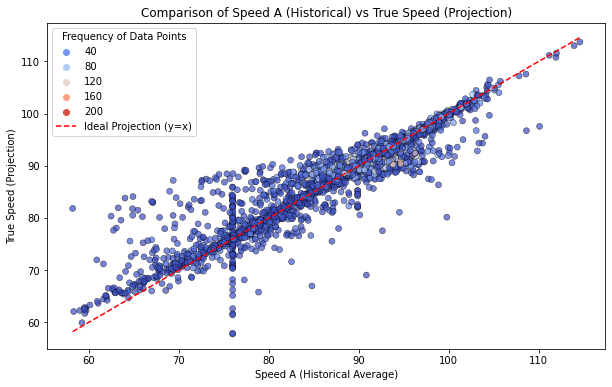

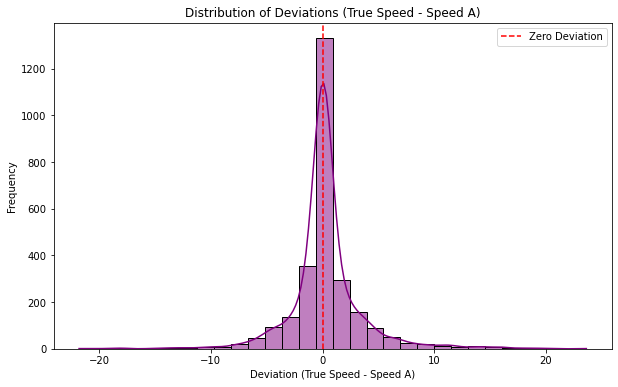

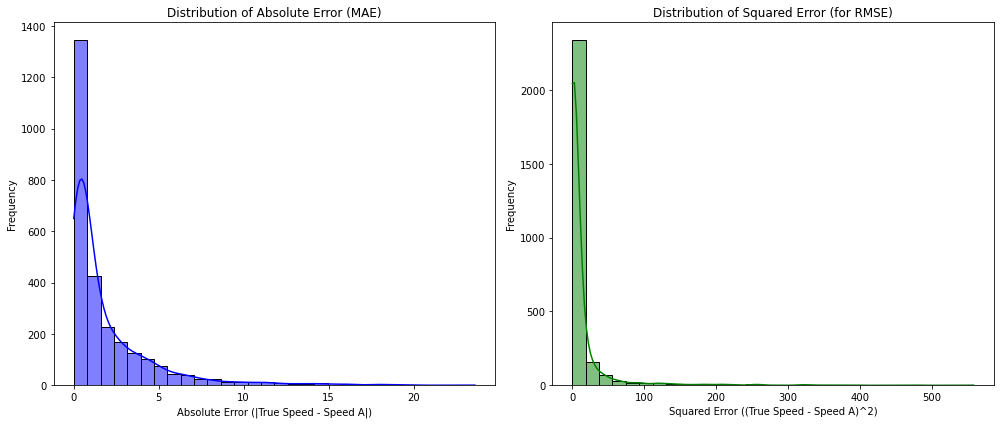

In [108]:

# Including 'data_count' in 'batter_hittype_projections'
batter_hittype_projections = batter_hittype_stats[['batter', 'hittype', 'speed_A', 'True_speed', 'data_count']].copy()

# Comparison Plot for Speed A vs True Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='speed_A',
    y='True_speed',
    data=batter_hittype_projections,
    hue='data_count',  # Coloring by data count to indicate frequency
    palette='coolwarm',
    edgecolor='k',
    alpha=0.7
)
# Add ideal line (y=x) for perfect alignment
plt.plot(
    [batter_hittype_projections['speed_A'].min(), batter_hittype_projections['speed_A'].max()],
    [batter_hittype_projections['speed_A'].min(), batter_hittype_projections['speed_A'].max()],
    color='red', linestyle='--', label="Ideal Projection (y=x)"
)
plt.title("Comparison of Speed A (Historical) vs True Speed (Projection)")
plt.xlabel("Speed A (Historical Average)")
plt.ylabel("True Speed (Projection)")
plt.legend(title="Frequency of Data Points")
plt.show()


# Calculate the deviation as the difference between Speed A and True Speed
batter_hittype_projections['deviation'] = batter_hittype_projections['True_speed'] - batter_hittype_projections['speed_A']

plt.figure(figsize=(10, 6))
sns.histplot(batter_hittype_projections['deviation'], bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='--', label="Zero Deviation")
plt.title("Distribution of Deviations (True Speed - Speed A)")
plt.xlabel("Deviation (True Speed - Speed A)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Calculating the absolute errors and squared errors for MAE and RMSE visualization
batter_hittype_projections['absolute_error'] = batter_hittype_projections['deviation'].abs()
batter_hittype_projections['squared_error'] = batter_hittype_projections['deviation'] ** 2

plt.figure(figsize=(14, 6))

# Plot for Mean Absolute Error (MAE)
plt.subplot(1, 2, 1)
sns.histplot(batter_hittype_projections['absolute_error'], bins=30, kde=True, color="blue")
plt.title("Distribution of Absolute Error (MAE)")
plt.xlabel("Absolute Error (|True Speed - Speed A|)")
plt.ylabel("Frequency")

# Plot for Root Mean Squared Error (RMSE)
plt.subplot(1, 2, 2)
sns.histplot(batter_hittype_projections['squared_error'], bins=30, kde=True, color="green")
plt.title("Distribution of Squared Error (for RMSE)")
plt.xlabel("Squared Error ((True Speed - Speed A)^2)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Comparison of Speed A (Historical) vs True Speed (Projection)

    Most points are clustered along this line, suggesting that the projections are close to the Speed_A for a large portion of the data, which implies that the projection model is accurately maintaining historical tendencies.
    However, some scatter is evident, especially below the line, indicating that certain projections fall below historical averages. This could reflect adjustments in the projections that account for lower performance trends of the batter.

## Distribution of Deviations (True Speed - Speed A)

    The peak at zero deviation (centered around the red line) indicates that many projections are very close to their initial accurate measurement (speed_A) which suggests that the model retains individual tendencies effectively.
    The distribution is relatively symmetric around zero but has a slight spread, with deviations on both the positive and negative sides. This symmetry implies that the model does not systematically over- or under-estimate projections compared to historic Speed_A or Intitial Speed_A
    The presence of small deviations on either side suggests some flexibility in the projections, allowing them to account for slight performance variations without deviating drastically from historical averages.

## Distribution of Absolute Error (MAE) and Squared Error (for RMSE)
    The Absolute Error histogram shows that most deviations are small, with a high concentration near zero, which aligns with the low MAE observed. This suggests that the majority of projections are close to their respective historical/Intial Speed_A.
        
    The Squared Error histogram has a similar concentration near zero but with a longer tail, indicating some larger deviations. This tail affects the RMSE more than the MAE, reflecting the presence of a few outliers with more significant projection errors.

    The heavy concentration around zero in both plots confirms that the projection model provides reliable and consistent estimates with minimal large deviations, making it suitable for cases where stability and close alignment with historical Speed_A are important.

# Conclusion

    The projection model shows strong alignment with each batter's historical performance (speed_A), as evidenced by the close scatter plot alignment and low deviations, which effectively capture individual tendencies. The stability of absolute and squared error distributions further confirms that most projections deviate only slightly from historical averages, ensuring consistent projections. Although a few larger deviations are present, the model remains flexible, accommodating batters with varied performances (good or bad) without disrupting its general accuracy. These visualizations highlight the model's reliability in capturing batter-specific trends while maintaining stability and flexibility in its projections.

### Checking the Alignments of True_Speed with System A values for each hit type (e.g., ground_ball, line_drive, fly_ball, popup).

In [109]:
# Merge the True Speed data back into the main DataFrame
df_ray_filtered_ = df_ray_filtered.merge(
    batter_hittype_projections[['batter', 'hittype', 'True_speed']],
    on=['batter', 'hittype'],
    how='left'
)


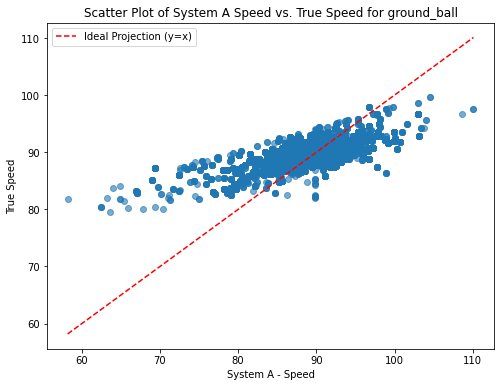

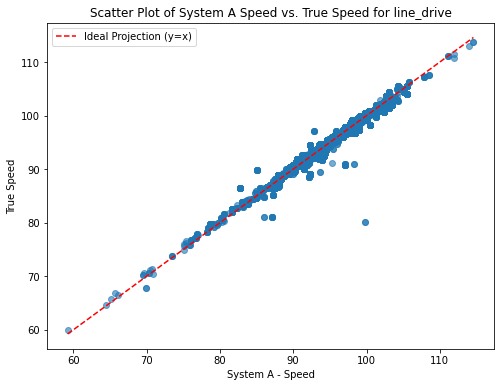

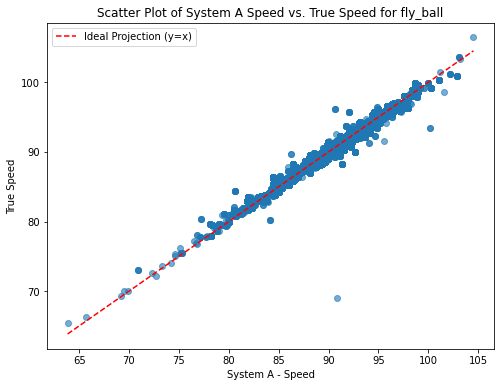

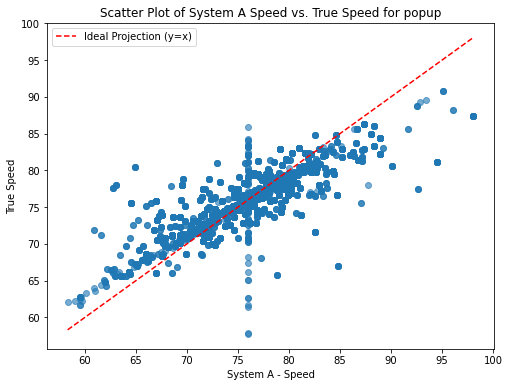

In [110]:
# Define a function to create scatter plots for each hit type
def plot_actual_vs_true_speed(hit_type):
    subset = df_ray_filtered_[df_ray_filtered_['hittype'] == hit_type]
    plt.figure(figsize=(8, 6))
    
    # Plot System A (Speed A) vs True Speed
    plt.scatter(subset['speed_A'], subset['True_speed'], alpha=0.6)
    
    # Ideal line (y = x) for perfect alignment
    plt.plot([subset['speed_A'].min(), subset['speed_A'].max()],
             [subset['speed_A'].min(), subset['speed_A'].max()], 
             color='red', linestyle='--', label='Ideal Projection (y=x)')
    
    plt.xlabel('System A - Speed')
    plt.ylabel('True Speed')
    plt.title(f'Scatter Plot of System A Speed vs. True Speed for {hit_type}')
    plt.legend()
    plt.show()

# Generate scatter plots for each hit type, only for Speed
for hit_type in df_ray_filtered_['hittype'].unique():
    plot_actual_vs_true_speed(hit_type)


# Categorizing Performance

In [128]:
# I Ddefine a threshold for performance categorization (e.g., ±1 unit difference)
threshold = 1.0

# Categorize batters based on projected performance and group them by hit type
batter_hittype_stats['performance_category'] = batter_hittype_stats.apply(
    lambda row: 'Above Performance' if row['True_speed'] > row['speed_A'] + threshold else
                'Underperform' if row['True_speed'] < row['speed_A'] - threshold else
                'Maintain Performance', axis=1
)

# Dictionary to store the top batter in each category for each hit type
top_batter_by_hit_type = {}

# Iterate over each hit type to find the top batter in each performance category
for hit_type in batter_hittype_stats['hittype'].unique():
    # the  i filter by hit type
    subset = batter_hittype_stats[batter_hittype_stats['hittype'] == hit_type]
    
    # Finding the top batter in each category
    top_batter_by_hit_type[hit_type] = {
        'Above Performance': subset[subset['performance_category'] == 'Above Performance']
            .sort_values(by='True_speed', ascending=False).head(1),
        
        'Maintain Performance': subset[subset['performance_category'] == 'Maintain Performance']
            .sort_values(by='True_speed', ascending=False).head(1),
        
        'Underperform': subset[subset['performance_category'] == 'Underperform']
            .sort_values(by='True_speed', ascending=False).head(1)
    }

# Display results for each hit type and category
for hit_type, performance_data in top_batter_by_hit_type.items():
    print(f"Hit Type: {hit_type}")
    for category, top_batter in performance_data.items():
        print(f"\nTop Batter in {category}:")
        print(top_batter[['batter', 'True_speed', 'speed_A', 'performance_category']])
    print("\n" + "="*50 + "\n")


Hit Type: fly_ball

Top Batter in Above Performance:
      batter  True_speed     speed_A performance_category
2437     737  106.445157  104.525193    Above Performance

Top Batter in Maintain Performance:
      batter  True_speed     speed_A  performance_category
2175     656  103.580283  103.065479  Maintain Performance

Top Batter in Underperform:
      batter  True_speed     speed_A performance_category
2575     781  100.937236  102.907383         Underperform


Hit Type: ground_ball

Top Batter in Above Performance:
      batter  True_speed   speed_A performance_category
1487     438   97.891899  96.69823    Above Performance

Top Batter in Maintain Performance:
      batter  True_speed    speed_A  performance_category
1248     368   96.654555  97.231008  Maintain Performance

Top Batter in Underperform:
     batter  True_speed     speed_A performance_category
116      37   99.655433  104.512346         Underperform


Hit Type: line_drive

Top Batter in Above Performance:
      ba